In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
from os.path import join
import numpy as np
import cv2
import matplotlib.pyplot as plt
from side_extractor import process_piece, plot_side_images
from functools import partial
import traceback

In [3]:
# Show an image in the notebook at the same size as the image
# with optional title and colormap
def show(img, title=None, cmap=None):

    dpi = 80
    height = img.shape[0]
    width = img.shape[1]

    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    if (cmap):
        ax.imshow(img, cmap=cmap)
    else:
        ax.imshow(img)
        
    if (title):
        plt.title(title)
        
    plt.show()

In [4]:
label_tuples = [('A', 74), ('B', 43), ('C', 19), ('D', 72), ('E', 11)]

def create_label(label_tuple):
    letter, max_num = label_tuple
    for i in range(1, max_num + 1):
        label = letter + str(i) if i >= 10 else letter + '0' + str(i)
        yield label
        
labels = []
for label_tuple in label_tuples:
    for label in create_label(label_tuple):
        labels.append(label)

In [5]:
filenames = os.listdir('images')
filenames.sort()

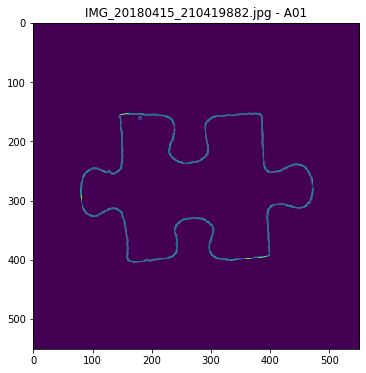

[(-3, -238, 37325), (241, -13, -90327), (8, 239, -97095), (246, -12, -33810)]


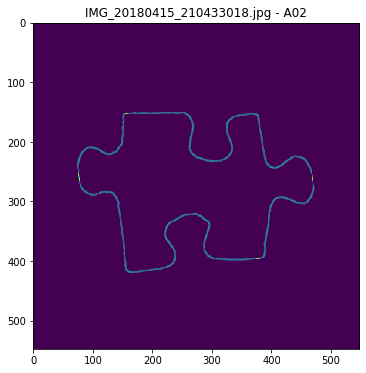

[(0, -227, 34731), (240, -11, -88797), (24, 233, -100881), (264, -5, -38835)]


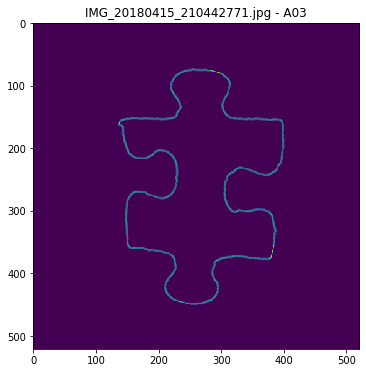

[(0, -257, 39835), (223, 18, -90875), (-21, 228, -78267), (202, -11, -26171)]


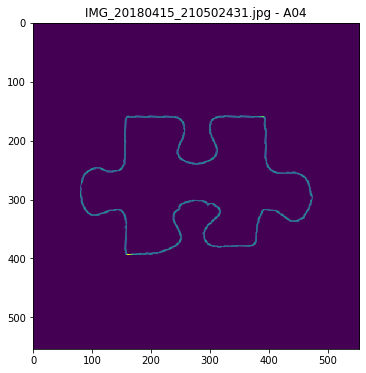

[(0, -234, 37206), (217, 16, -87391), (15, 220, -88345), (232, 2, -36742)]


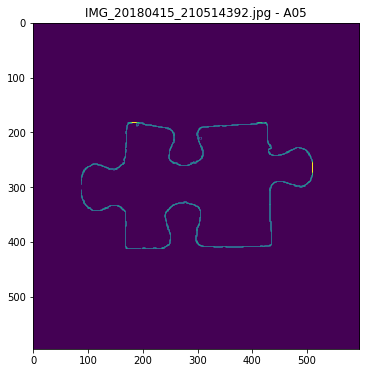

[(0, -254, 46482), (223, -8, -93534), (6, 266, -110600), (229, 4, -40120)]


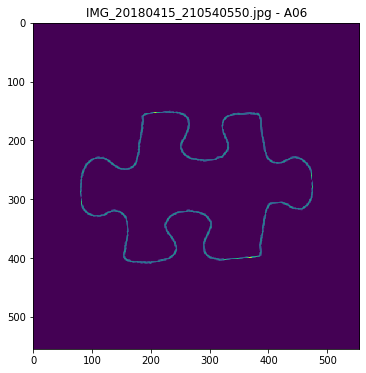

[(-1, -194, 30064), (244, -3, -92749), (6, 231, -94017), (249, 34, -52048)]


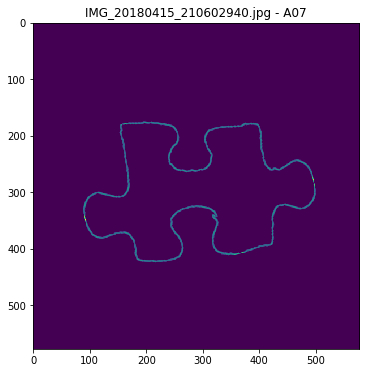

[(-2, -244, 44226), (215, -24, -81083), (26, 239, -104873), (239, -29, -31347)]


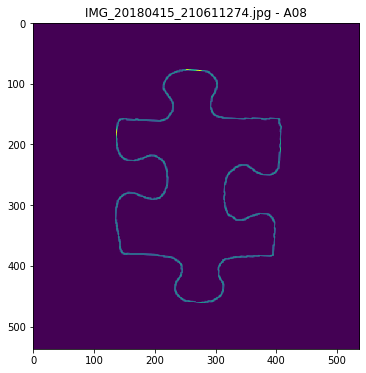

[(0, -260, 41080), (227, 10, -92607), (-6, 248, -93134), (221, -2, -30845)]


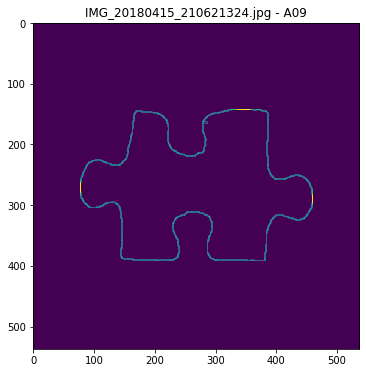

[(-1, -215, 31343), (248, 4, -95560), (-6, 236, -90238), (241, 25, -44113)]


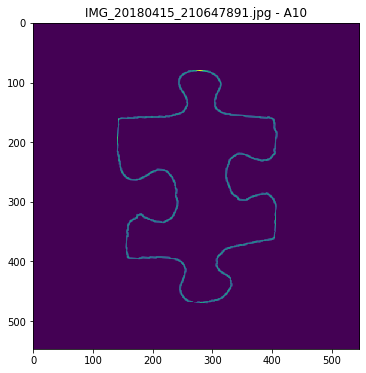

[(0, -258, 41280), (204, -2, -81280), (30, 246, -101604), (234, -14, -30988)]


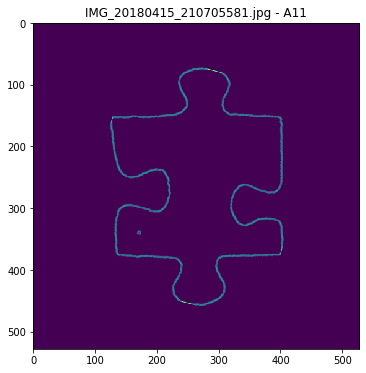

[(0, -271, 41192), (225, 0, -89775), (-2, 266, -99484), (223, -5, -27784)]


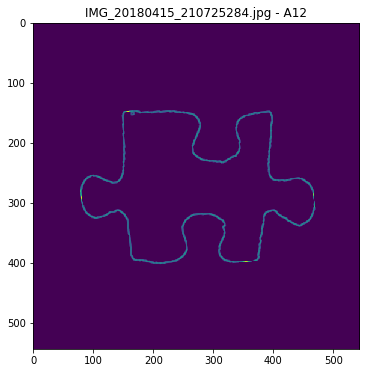

[(-1, -244, 36261), (249, 20, -100797), (-3, 210, -82041), (245, -14, -34433)]


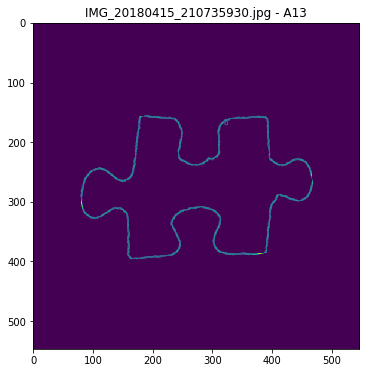

[(1, -212, 33107), (225, 1, -87683), (10, 229, -91587), (236, 18, -44598)]


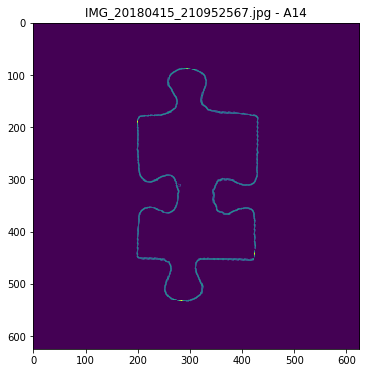

[(0, -227, 40406), (277, 7, -120079), (-4, 224, -100232), (273, 4, -55858)]


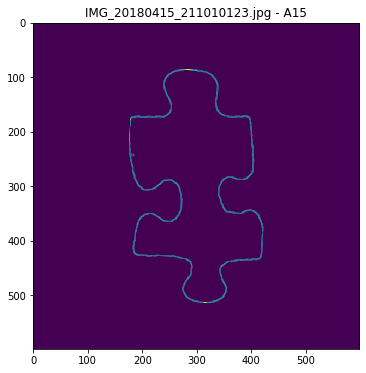

[(0, -217, 37541), (261, -21, -99462), (-10, 233, -96962), (251, -5, -43813)]


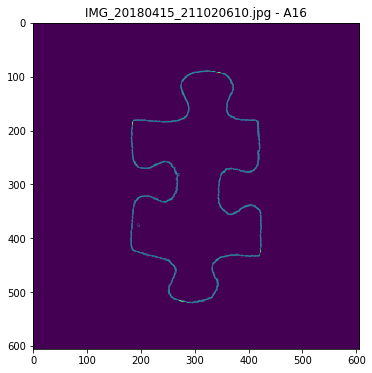

[(0, -231, 42042), (252, -4, -104104), (-12, 238, -98252), (240, 3, -44946)]


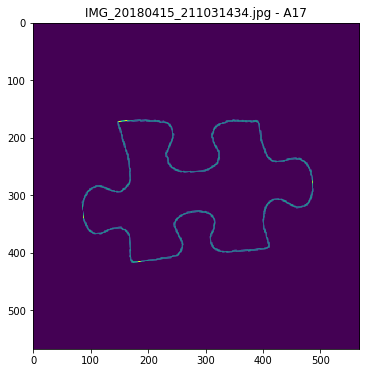

[(-2, -244, 42260), (222, -18, -83520), (23, 240, -103464), (243, -22, -31694)]


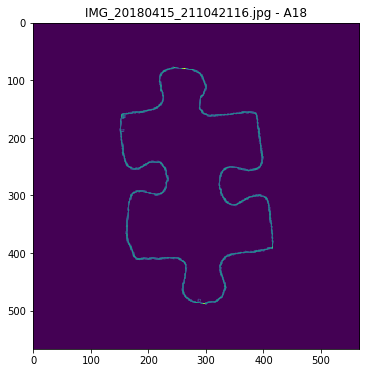

[(0, -235, 37130), (236, -27, -87066), (16, 239, -100790), (252, -23, -34670)]


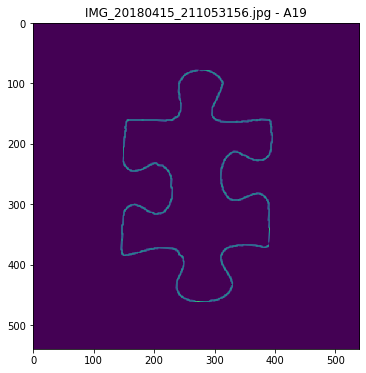

[(0, -237, 37920), (211, 2, -82821), (13, 244, -95581), (224, 9, -35936)]


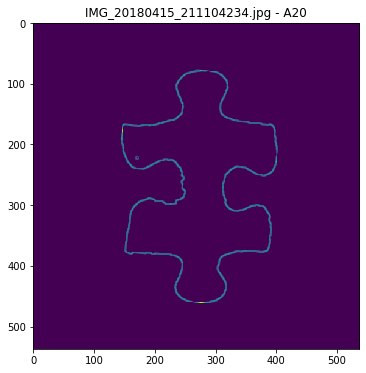

[(0, -247, 41496), (209, 8, -83481), (1, 235, -88980), (210, -4, -29988)]


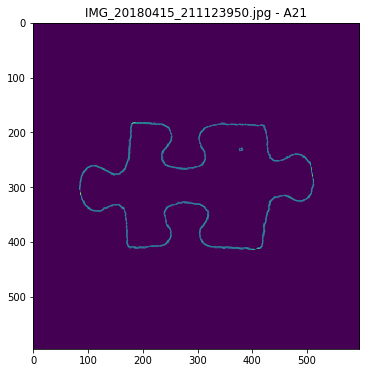

[(2, -244, 44542), (224, 5, -95234), (-1, 244, -99624), (225, 5, -40745)]


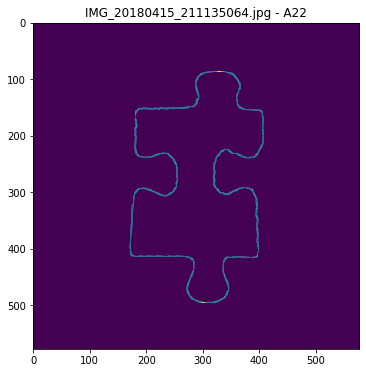

[(0, -221, 34034), (262, 6, -106510), (-4, 226, -92428), (258, 11, -48650)]


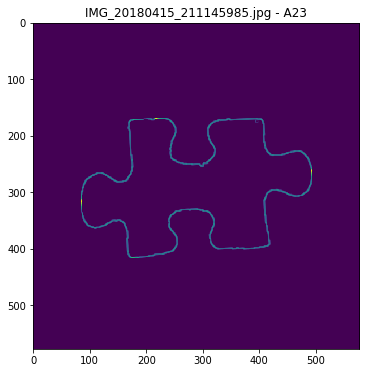

[(-2, -235, 40760), (224, -11, -88850), (21, 248, -106448), (243, 2, -41654)]


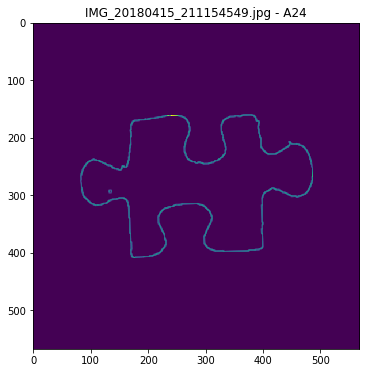

[(0, -221, 37570), (223, -3, -87129), (15, 227, -95151), (238, 3, -41446)]


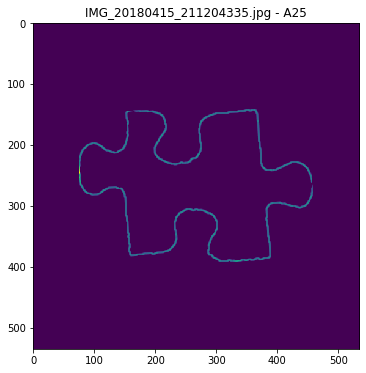

[(-3, -212, 31196), (243, -24, -85044), (-5, 231, -86995), (235, -5, -34995)]


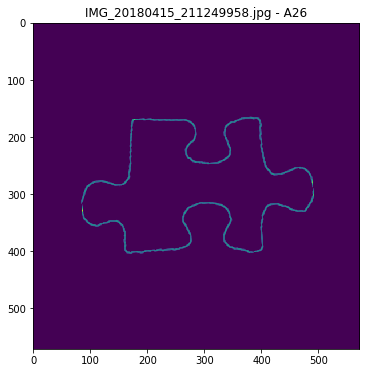

[(-4, -222, 38428), (231, -4, -90350), (5, 237, -96079), (232, 11, -41774)]


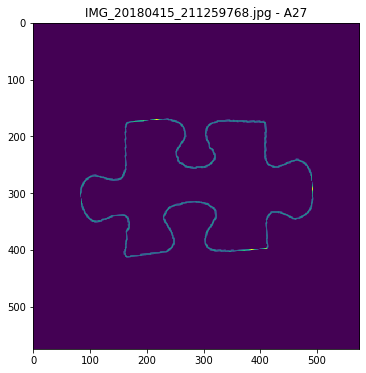

[(0, -243, 42282), (223, -4, -90288), (15, 251, -105827), (238, 4, -39966)]


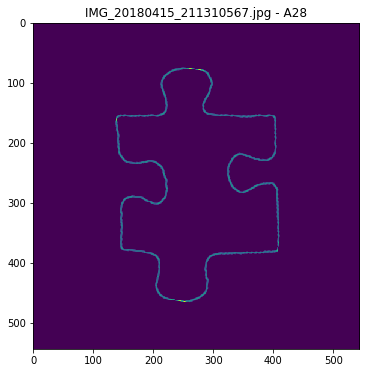

[(0, -263, 41028), (227, -5, -90247), (-6, 261, -97527), (221, -7, -29406)]


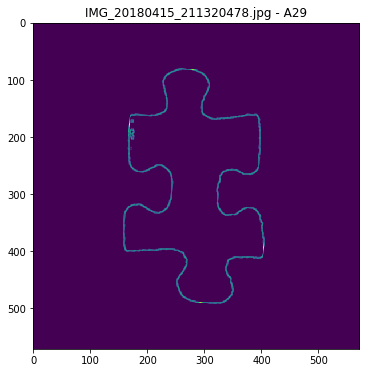

[(0, -225, 36675), (250, -6, -97522), (-14, 241, -93933), (236, 10, -41514)]


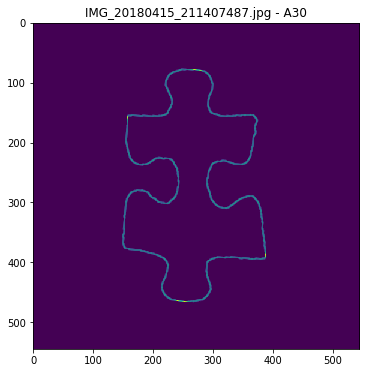

[(0, -213, 33015), (240, -17, -86165), (-19, 237, -86262), (221, 7, -35782)]


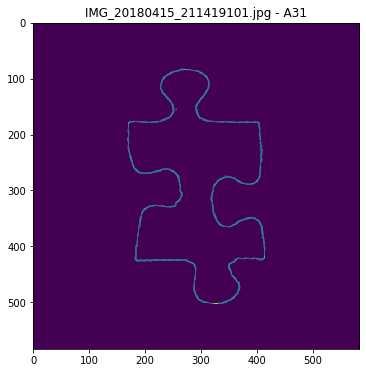

[(0, -233, 41474), (245, -11, -96532), (3, 231, -98952), (248, -13, -39598)]


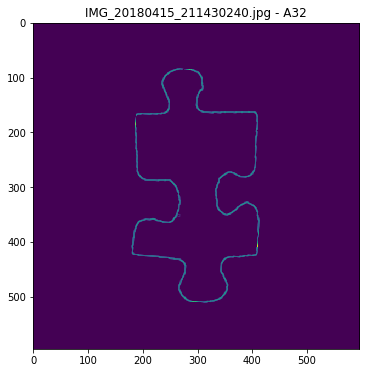

[(0, -221, 36686), (259, 2, -106004), (-3, 227, -95257), (256, 8, -49200)]


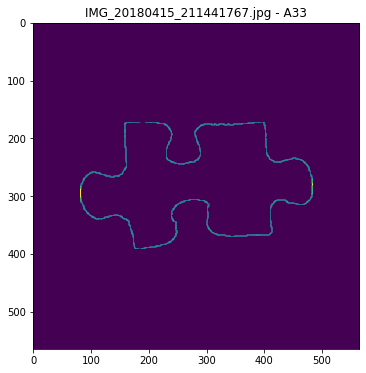

[(-1, -241, 41851), (194, -13, -75170), (26, 237, -97454), (219, -17, -31661)]


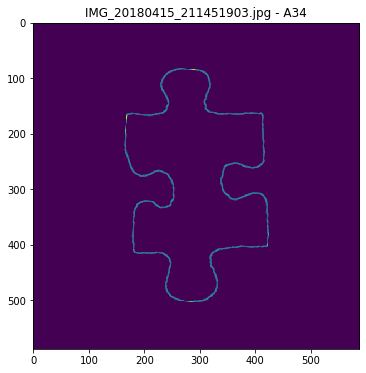

[(-1, -244, 40184), (240, -9, -97413), (10, 242, -101736), (249, -11, -40028)]


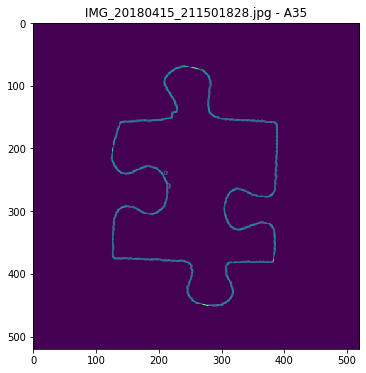

[(1, -249, 38955), (224, 5, -87478), (-8, 257, -95118), (217, 13, -31987)]


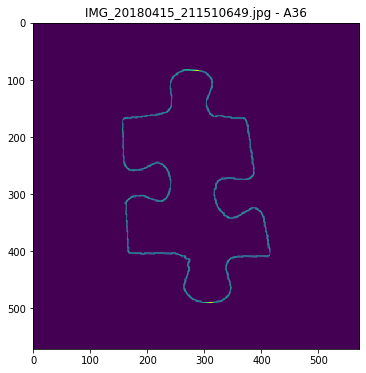

[(0, -214, 35952), (97, -13, -33706), (54, 223, -79777), (151, -4, -22884)]


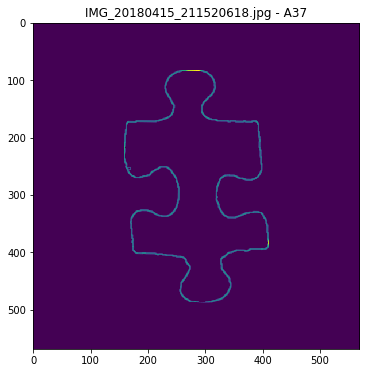

[(0, -228, 39444), (222, -18, -83466), (3, 236, -94444), (225, -10, -34720)]


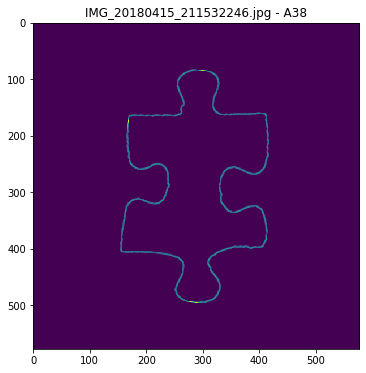

[(-2, -243, 40190), (236, 6, -98204), (6, 253, -103130), (240, 16, -43184)]


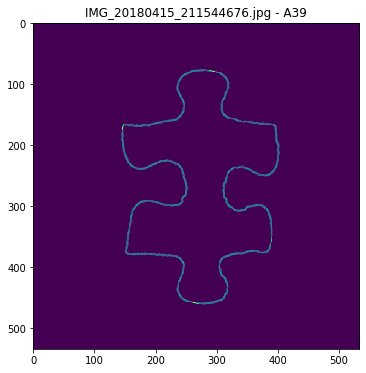

[(0, -247, 41496), (208, 10, -83424), (1, 233, -87991), (209, -4, -29842)]


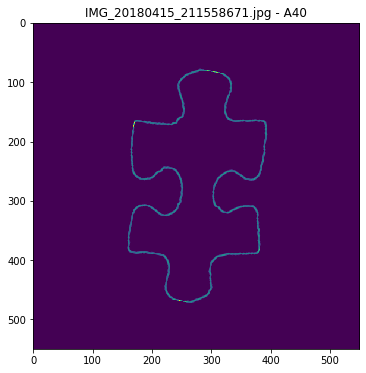

[(1, -220, 35910), (224, 11, -89175), (-4, 220, -84064), (221, 11, -39374)]


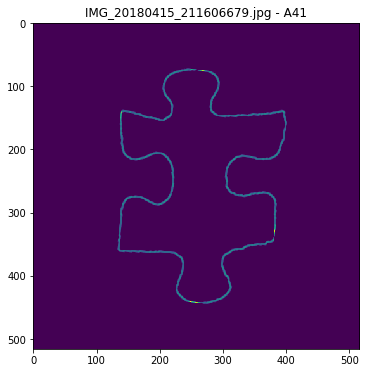

[(0, -256, 35840), (207, 18, -84285), (13, 244, -89569), (220, 6, -31420)]


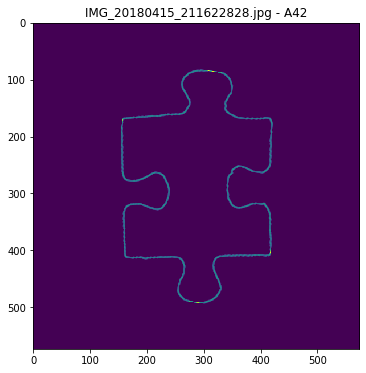

[(0, -261, 44109), (241, 3, -101245), (1, 256, -105375), (242, -2, -37656)]


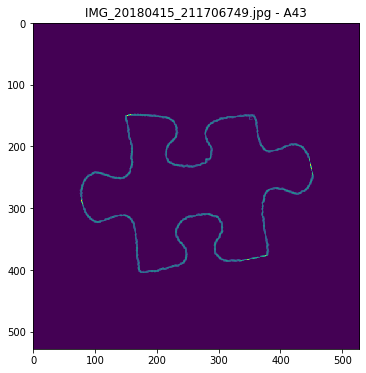

[(-2, -207, 31346), (228, -23, -77536), (27, 208, -88414), (253, -22, -34144)]


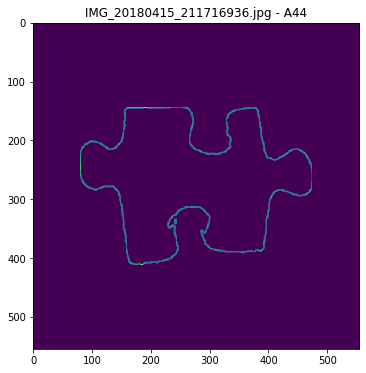

[(-1, -223, 32491), (244, -11, -90892), (21, 228, -96654), (264, -6, -40314)]


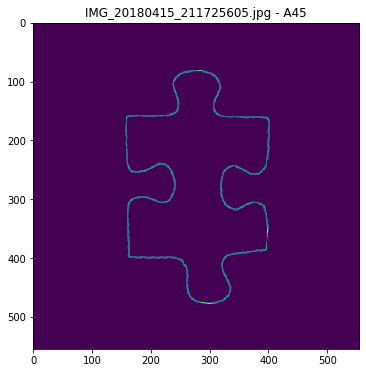

[(0, -241, 38560), (228, 3, -91224), (10, 235, -95130), (238, -3, -36886)]


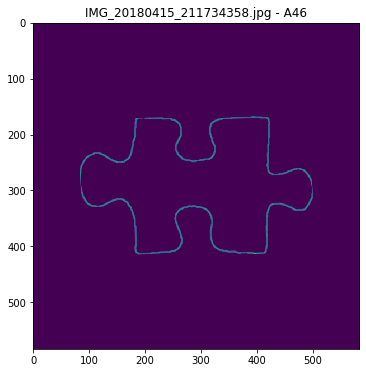

[(-2, -236, 40722), (242, 4, -102074), (0, 233, -95763), (240, 1, -44091)]


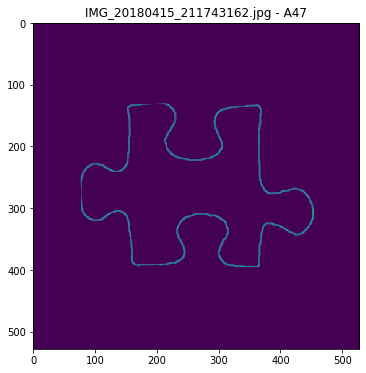

[(-3, -212, 29076), (263, 0, -95732), (-5, 205, -79155), (255, -7, -37815)]


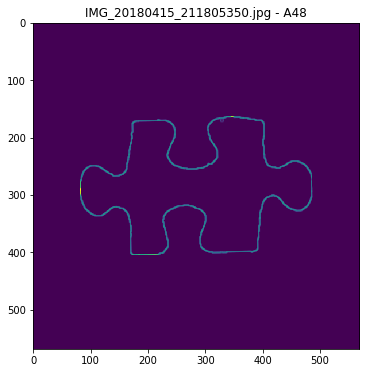

[(-2, -225, 38823), (229, 12, -93399), (5, 219, -89097), (232, 6, -41394)]


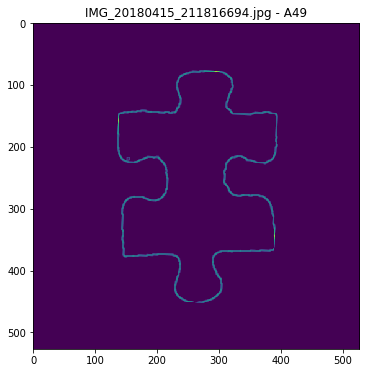

[(0, -254, 37338), (221, 3, -86852), (9, 244, -93284), (230, -7, -30481)]


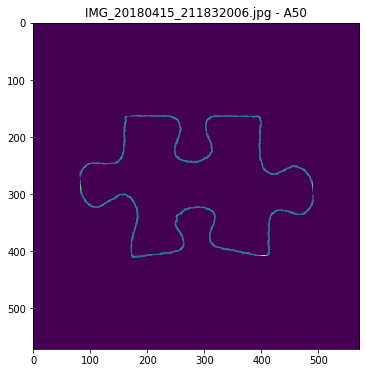

[(0, -236, 38704), (242, -14, -93536), (2, 239, -97854), (244, -11, -37236)]


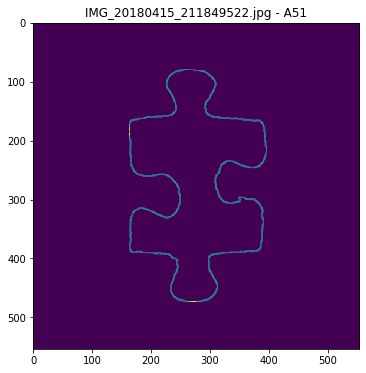

[(0, -223, 37018), (221, 2, -85638), (3, 220, -86292), (224, -1, -36346)]


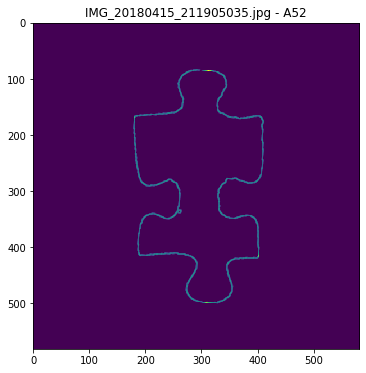

[(0, -226, 37742), (254, 5, -103705), (-7, 214, -87294), (247, -7, -43044)]


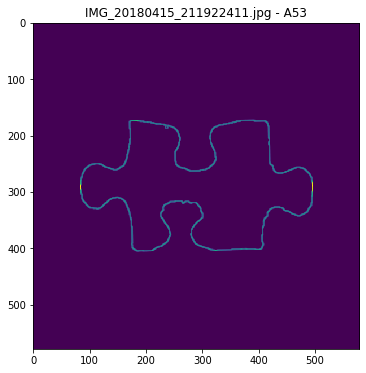

[(-1, -243, 42451), (228, 7, -95147), (0, 231, -92631), (227, -5, -37493)]


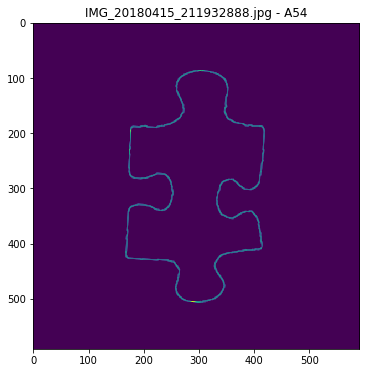

[(0, -240, 45120), (223, 4, -93520), (16, 244, -106876), (239, 8, -43568)]


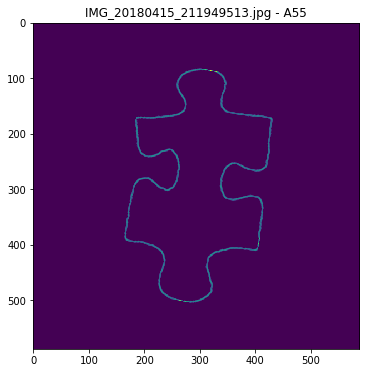

[(0, -244, 41724), (240, 27, -107577), (-20, 237, -89367), (220, 20, -44120)]


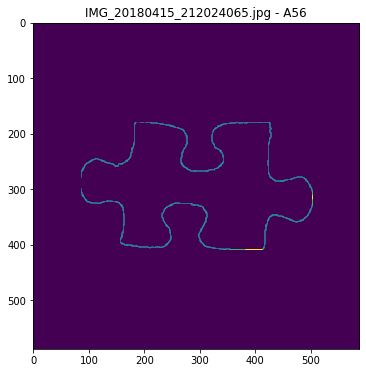

[(0, -243, 43497), (230, 12, -100128), (-12, 258, -100554), (218, 27, -44727)]


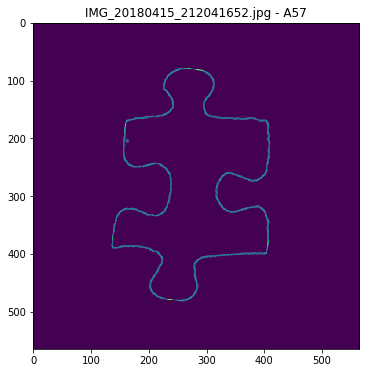

[(0, -243, 40824), (232, 0, -93728), (-9, 268, -103564), (223, 25, -40103)]


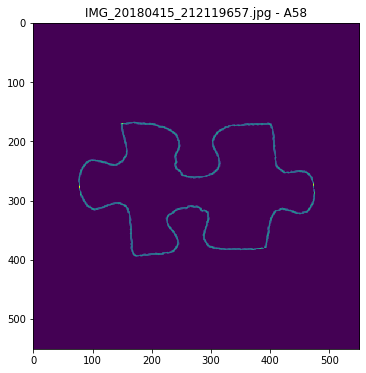

[(-1, -253, 43410), (210, 9, -85530), (13, 223, -89823), (222, -21, -29043)]


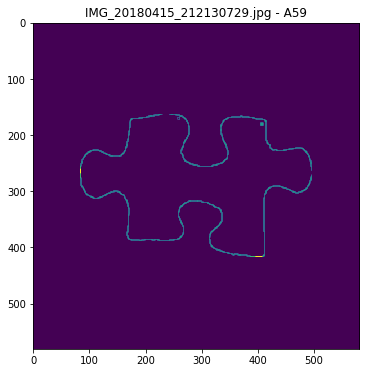

[(1, -239, 40696), (242, 3, -100220), (-28, 241, -88322), (215, 5, -38050)]


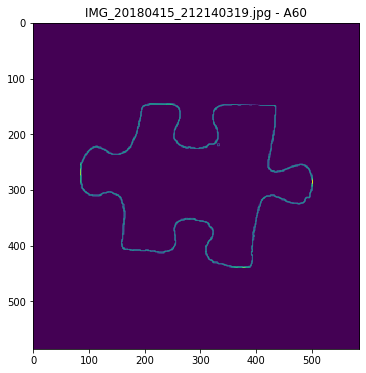

[(0, -236, 34928), (289, 42, -131353), (-32, 232, -88872), (257, 38, -56253)]


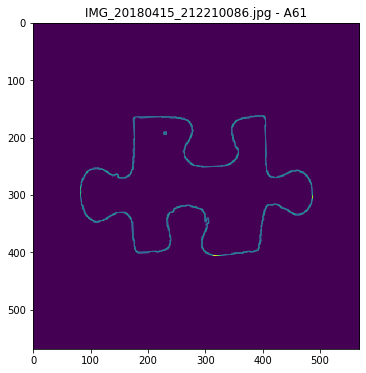

[(-3, -228, 37914), (234, 9, -95517), (5, 215, -86890), (236, -4, -40408)]


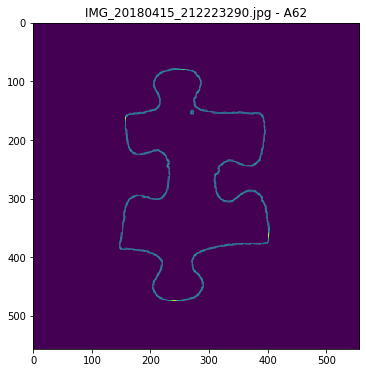

[(0, -230, 35880), (222, -9, -84954), (9, 251, -98460), (231, 12, -38601)]


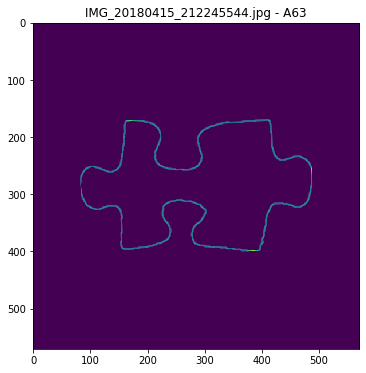

[(-3, -252, 43824), (230, 16, -97464), (-4, 243, -95373), (223, 7, -36884)]


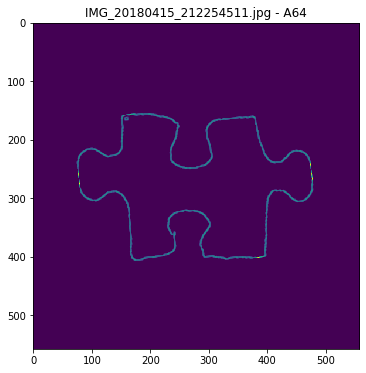

[(1, -227, 35715), (240, -19, -87699), (4, 230, -93358), (245, -16, -34467)]


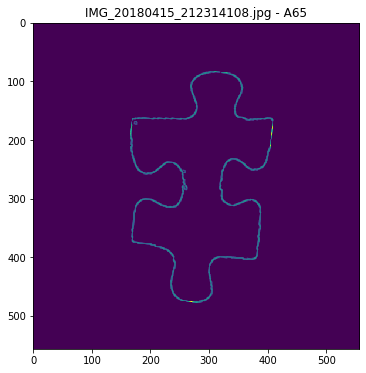

[(0, -237, 38631), (242, 27, -102411), (-29, 209, -73683), (213, -1, -35621)]


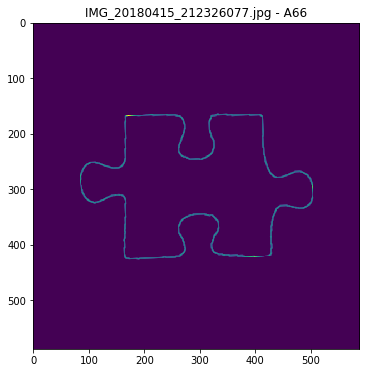

[(-2, -247, 41824), (253, -16, -101327), (5, 263, -112332), (256, 0, -41984)]


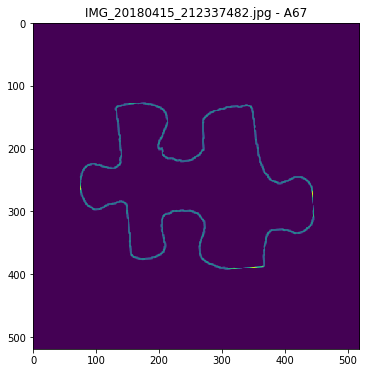

[(-2, -212, 28248), (252, -15, -84738), (-11, 205, -74361), (239, -22, -28644)]


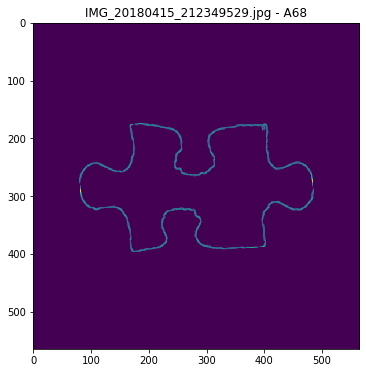

[(-1, -236, 41703), (211, 2, -85383), (10, 232, -93562), (220, -2, -36388)]


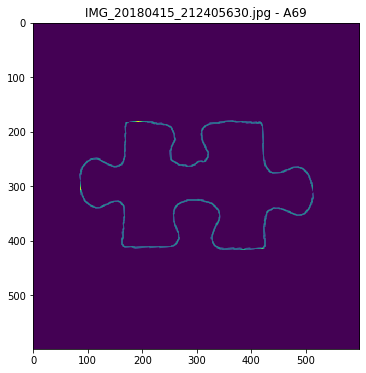

[(-1, -249, 45736), (230, -4, -95412), (-3, 260, -105854), (226, 7, -39475)]


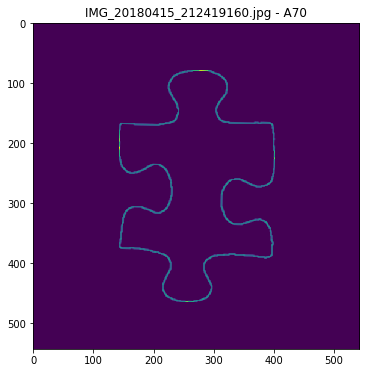

[(0, -253, 42504), (223, 2, -88644), (-17, 252, -91834), (206, 1, -29626)]


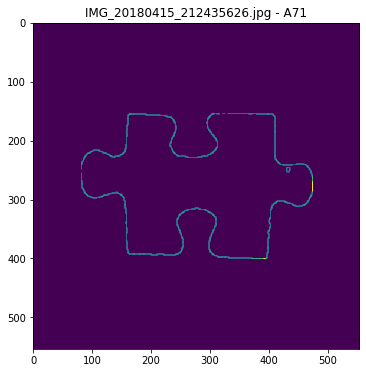

[(1, -244, 37414), (244, 12, -100924), (-8, 235, -90613), (237, 3, -38856)]


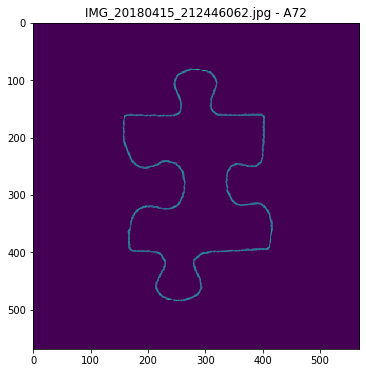

[(0, -240, 38400), (235, -10, -92400), (0, 244, -96380), (235, -6, -36640)]


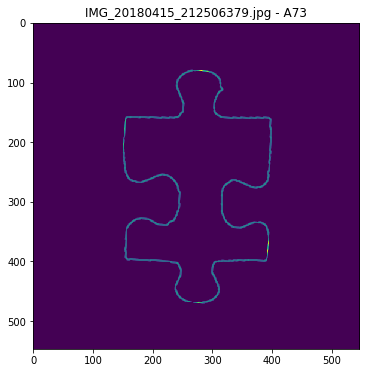

[(0, -241, 38801), (239, 5, -95210), (-5, 237, -92850), (234, 1, -36197)]


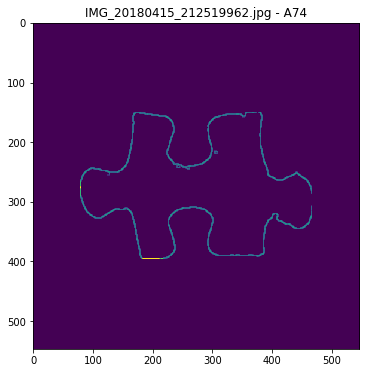

[(-1, -211, 32029), (236, -5, -88694), (8, 205, -82202), (243, -11, -39163)]


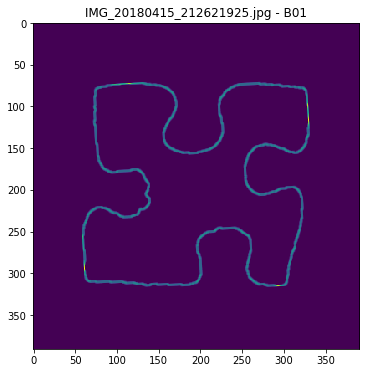

[(0, -253, 19734), (236, 24, -78808), (-6, 241, -73862), (230, 12, -17726)]


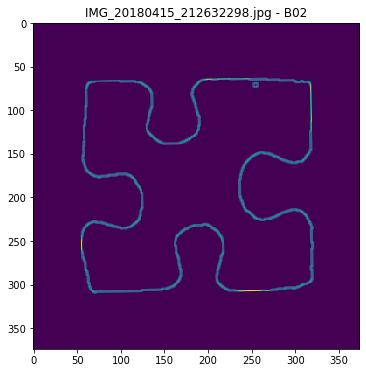

[(0, -250, 16500), (231, -4, -72270), (9, 255, -78597), (240, 1, -15426)]


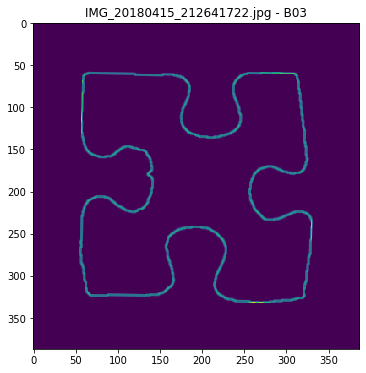

[(0, -253, 15686), (266, -9, -82168), (-8, 259, -82392), (258, -3, -14778)]


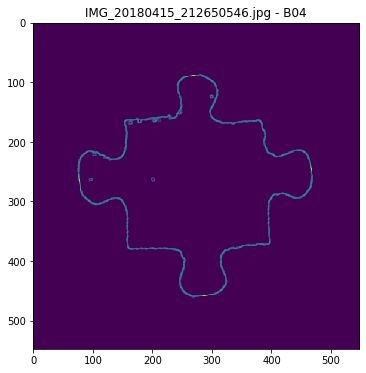

[(-1, -226, 36991), (209, -17, -76457), (8, 238, -91466), (216, -5, -32233)]


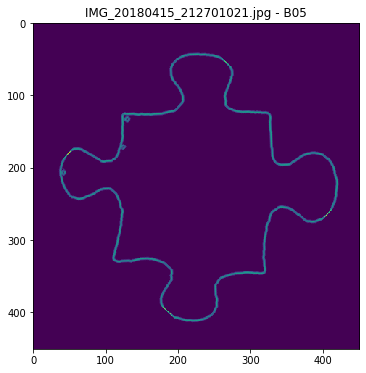

[(0, -199, 24477), (223, 6, -72990), (-19, 210, -66618), (204, 17, -27591)]


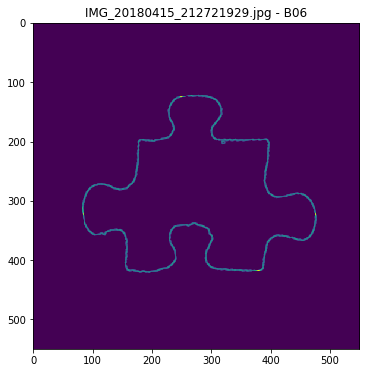

[(-2, -218, 43298), (221, 7, -88439), (-1, 232, -96125), (218, 21, -42505)]


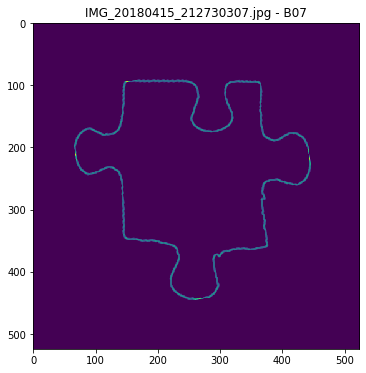

[(-2, -216, 20810), (266, -14, -94724), (-13, 230, -77695), (251, 0, -36395)]


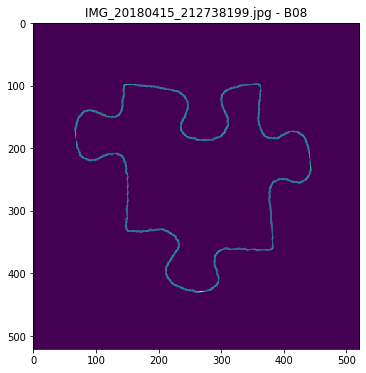

[(-3, -217, 21912), (266, -21, -93744), (-30, 234, -73278), (233, -4, -32923)]


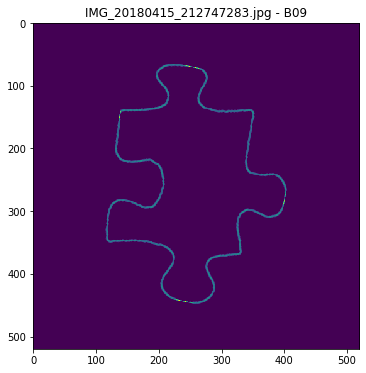

[(0, -209, 29051), (229, 18, -82194), (-20, 214, -72152), (209, 23, -32248)]


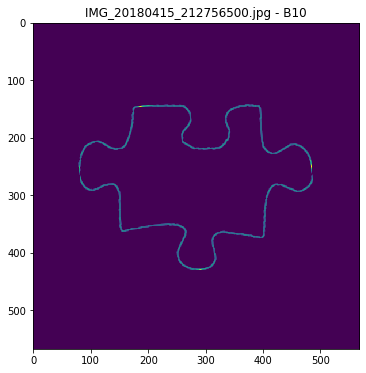

[(-1, -220, 32294), (229, -7, -89211), (-12, 250, -88688), (216, 23, -40942)]


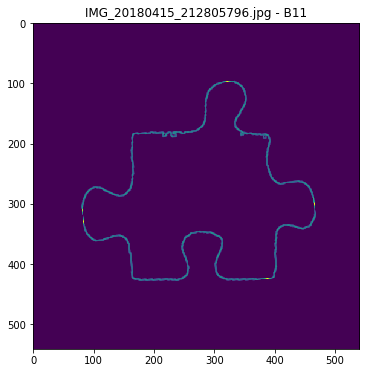

[(1, -224, 40828), (238, -10, -90504), (1, 236, -99990), (240, 2, -39726)]


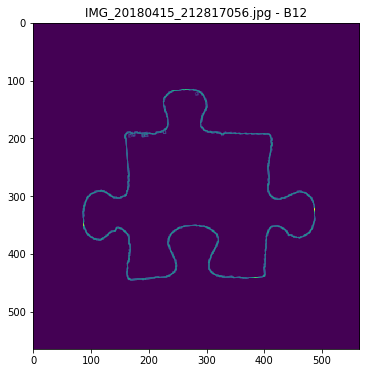

[(2, -250, 47182), (248, 10, -103352), (4, 237, -105876), (254, -3, -39816)]


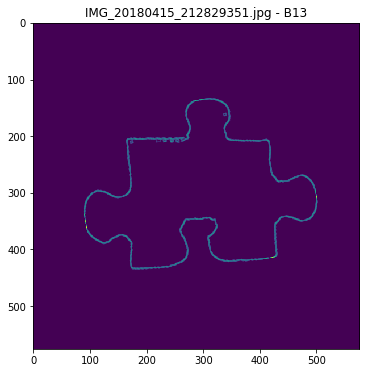

[(1, -248, 50427), (206, -15, -82003), (23, 256, -115060), (230, -7, -36522)]


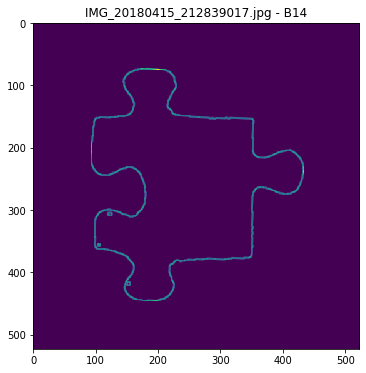

[(0, -255, 39015), (224, 4, -79460), (-15, 250, -89030), (209, -1, -20120)]


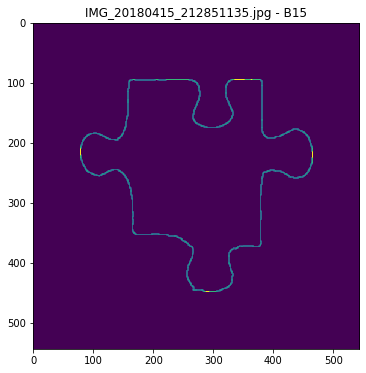

[(0, -219, 20805), (277, 3, -105268), (-20, 210, -70600), (257, -6, -40550)]


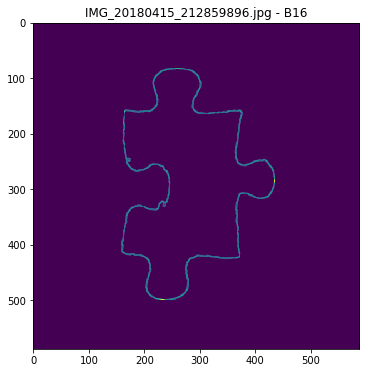

[(0, -211, 33338), (266, 4, -100116), (-10, 212, -86188), (256, 5, -42518)]


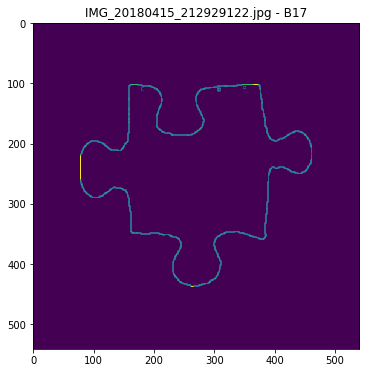

[(0, -215, 22145), (253, -10, -93592), (-10, 224, -75904), (243, -1, -38534)]


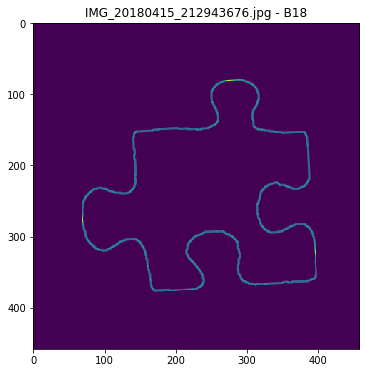

[(1, -239, 35947), (207, -14, -76739), (15, 230, -88495), (223, -23, -28193)]


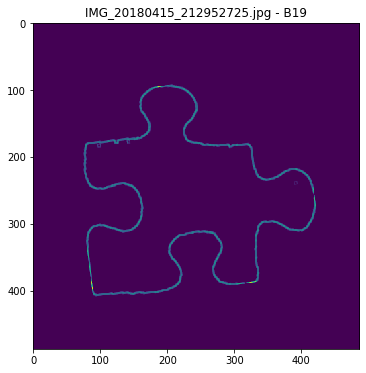

[(-1, -244, 43997), (205, -11, -63836), (21, 243, -100284), (225, -12, -15165)]


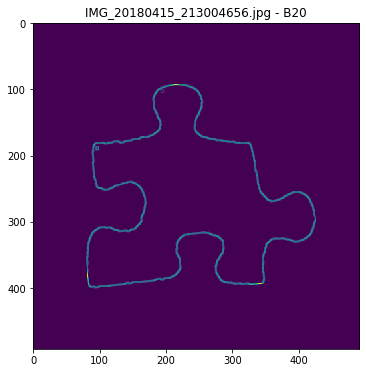

[(0, -235, 42300), (212, -18, -66084), (5, 262, -104429), (217, 9, -21584)]


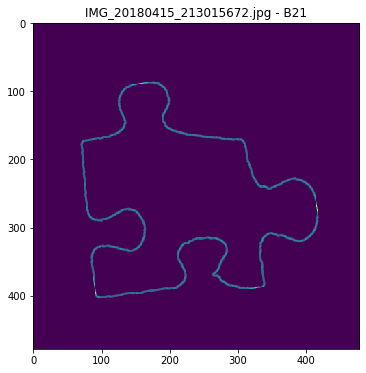

[(-2, -235, 40562), (217, -30, -61302), (15, 245, -99855), (230, -20, -12890)]


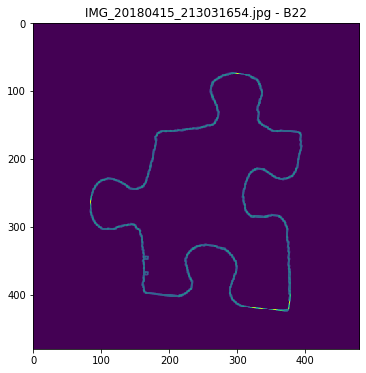

[(0, -211, 33971), (262, 17, -105441), (-26, 214, -80772), (236, 20, -45936)]


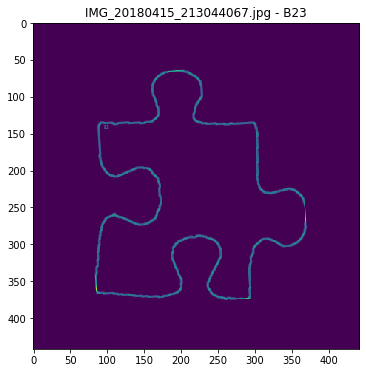

[(0, -210, 28140), (236, 8, -71636), (-6, 206, -74474), (230, 4, -21006)]


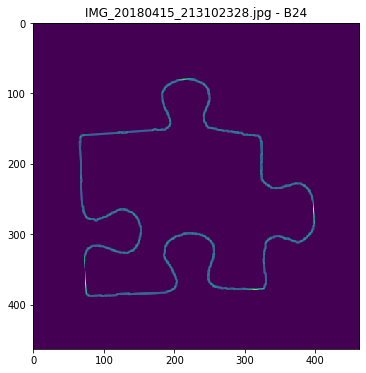

[(0, -253, 40227), (218, -9, -68329), (10, 255, -99425), (228, -7, -14163)]


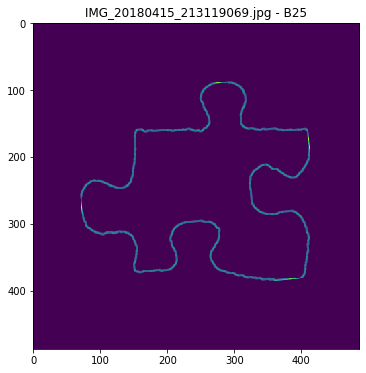

[(-2, -255, 40849), (223, 7, -91860), (-10, 251, -91380), (211, 3, -32549)]


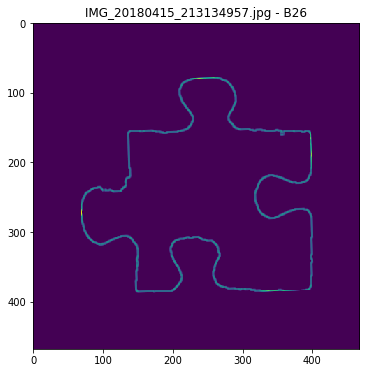

[(1, -261, 40058), (227, 1, -90274), (2, 250, -96292), (230, -10, -29740)]


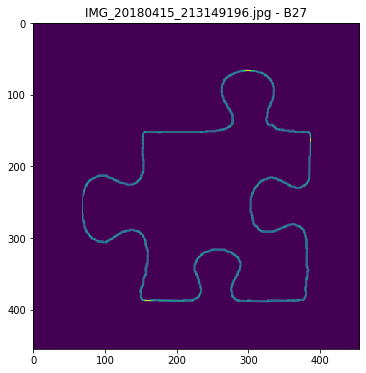

[(0, -230, 34730), (235, 5, -90995), (1, 230, -89159), (236, 5, -37099)]


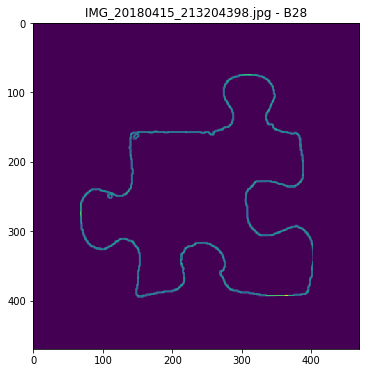

[(0, -239, 37523), (233, -15, -86185), (3, 248, -97905), (236, -6, -32334)]


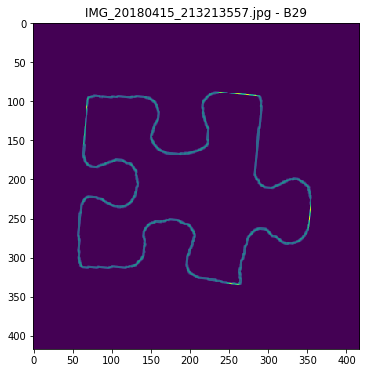

[(0, -219, 20367), (238, 27, -71293), (-21, 204, -62022), (217, 12, -16306)]


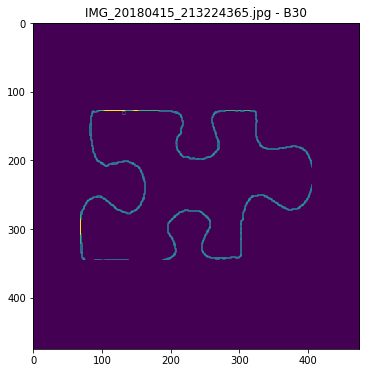

[(0, -237, 30336), (213, 21, -71487), (2, 232, -79716), (215, 16, -20538)]


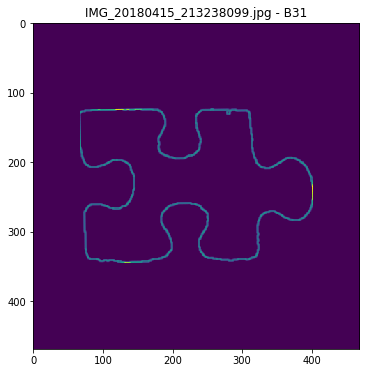

[(-1, -240, 30308), (210, -12, -63180), (2, 244, -82380), (211, -8, -13340)]


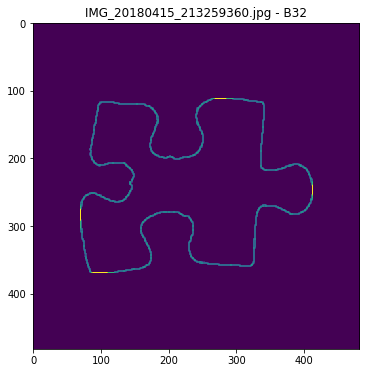

[(0, -241, 28197), (239, 15, -82776), (10, 242, -89392), (249, 16, -26274)]


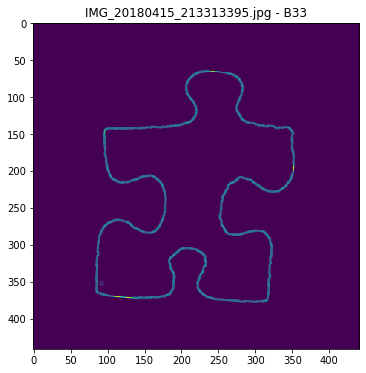

[(0, -250, 35500), (235, 33, -86231), (-12, 230, -82942), (223, 13, -23477)]


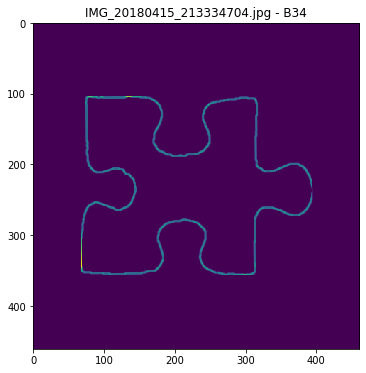

[(1, -240, 25127), (247, 3, -77629), (-3, 242, -84496), (245, 5, -18410)]


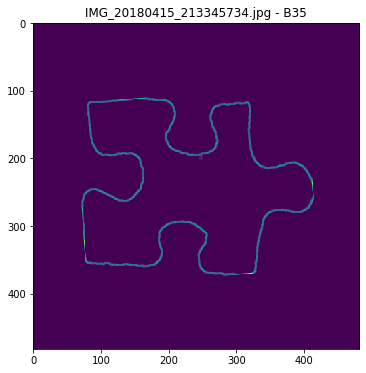

[(-1, -235, 27576), (253, -8, -79020), (-17, 248, -86004), (235, 5, -19620)]


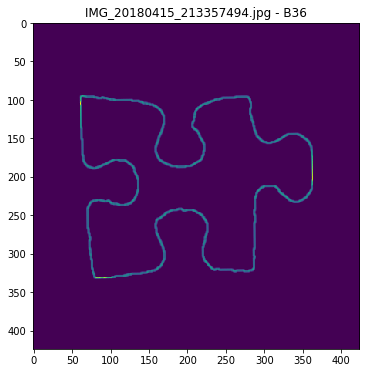

[(1, -221, 20935), (225, -4, -62841), (9, 207, -69012), (235, -18, -12390)]


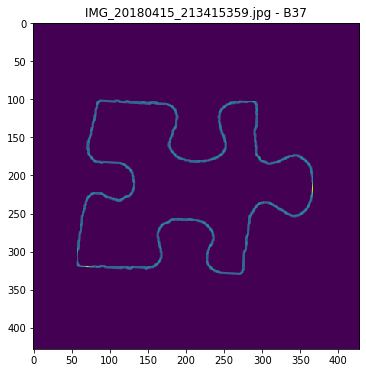

[(1, -207, 21030), (224, 17, -66935), (-8, 218, -69094), (217, 28, -21084)]


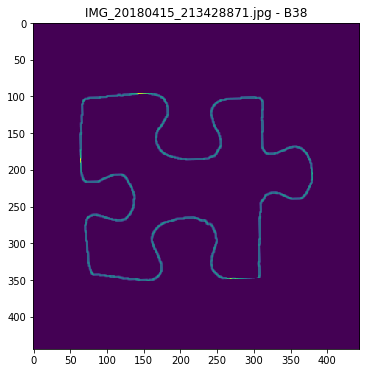

[(-1, -240, 24549), (243, 4, -75491), (-4, 229, -77556), (238, -7, -15708)]


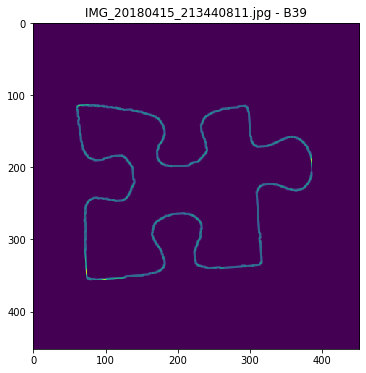

[(0, -235, 26790), (220, -18, -62848), (19, 240, -86107), (239, -13, -12858)]


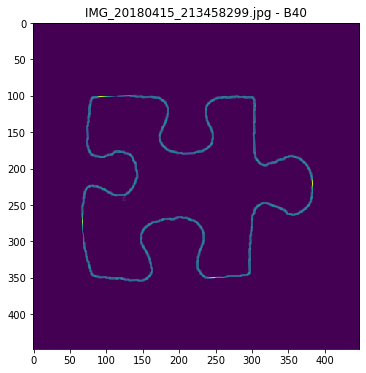

[(-1, -222, 22723), (243, 3, -73446), (2, 220, -76276), (244, 1, -19378)]


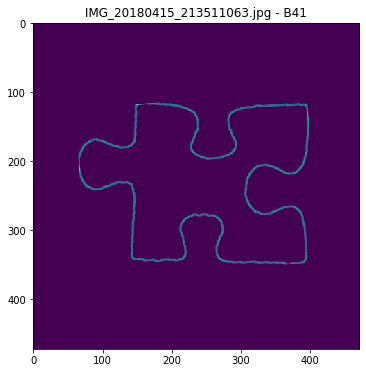

[(-1, -246, 29176), (227, 2, -89672), (-3, 250, -84824), (223, 6, -33712)]


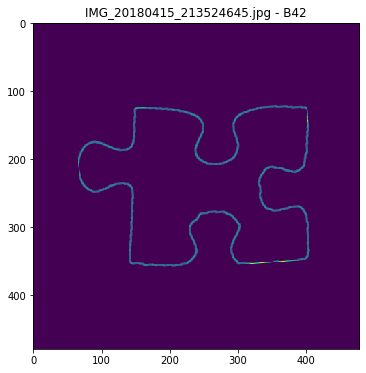

[(-2, -251, 31671), (221, -2, -87933), (8, 260, -92648), (227, 7, -34471)]


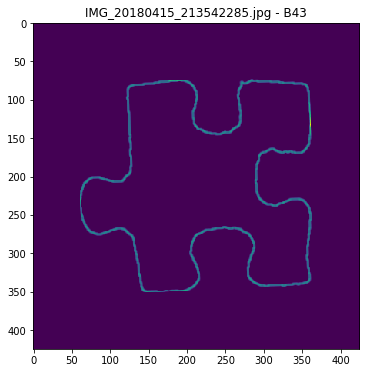

[(-3, -232, 19393), (259, -4, -91629), (10, 219, -77612), (266, -17, -31324)]


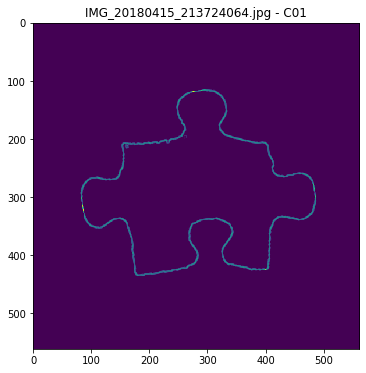

[(-2, -246, 51228), (218, -2, -86572), (9, 227, -99630), (225, -21, -30078)]


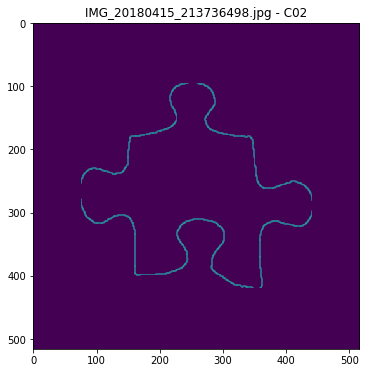

[(0, -190, 34010), (240, -16, -79456), (-23, 200, -75543), (217, -6, -32127)]


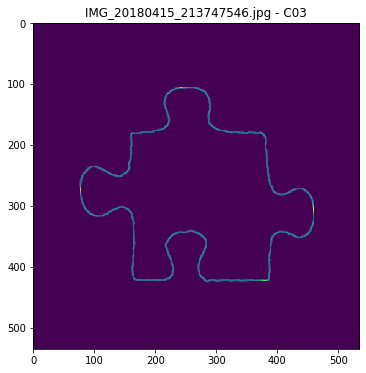

[(0, -216, 38880), (241, -10, -88816), (-1, 223, -93497), (240, -3, -37860)]


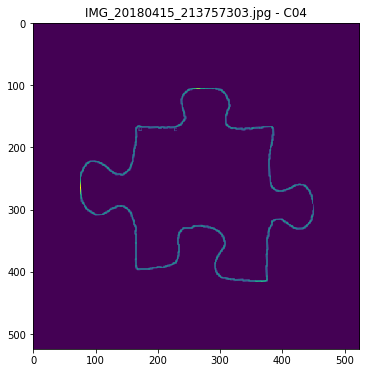

[(0, -217, 35805), (248, 9, -96469), (-18, 210, -79998), (230, 2, -38510)]


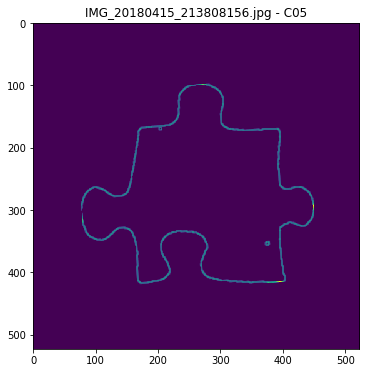

[(0, -224, 37632), (247, -9, -95559), (0, 236, -97940), (247, 3, -42247)]


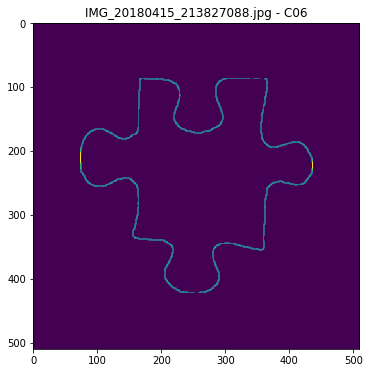

[(0, -198, 17226), (267, 5, -97623), (-19, 204, -65395), (248, 11, -42125)]


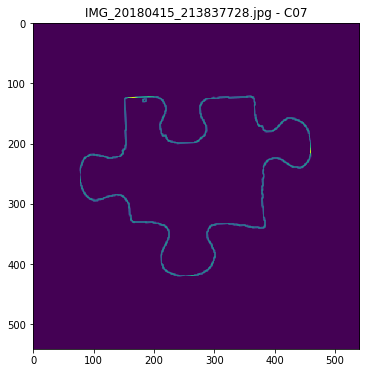

[(-3, -211, 26617), (219, -20, -76858), (-10, 221, -71320), (206, -10, -29866)]


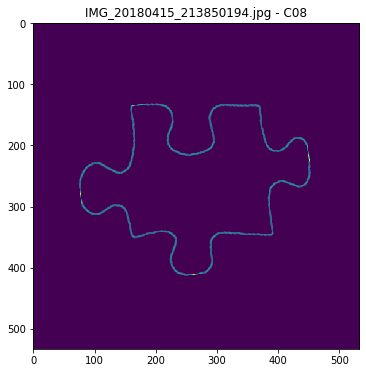

[(-2, -210, 28876), (213, -22, -75436), (1, 231, -80547), (212, -1, -33360)]


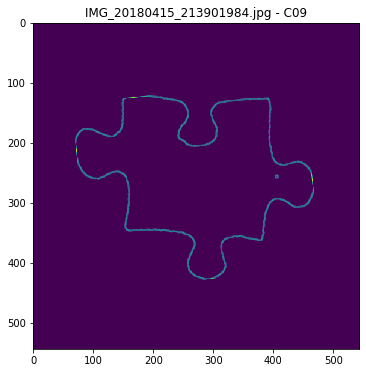

[(-1, -242, 30640), (237, 9, -93555), (-16, 228, -76440), (220, -5, -31930)]


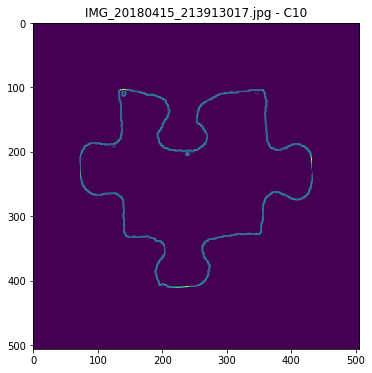

[(-1, -224, 23428), (224, 6, -80362), (3, 209, -69393), (226, -9, -28896)]


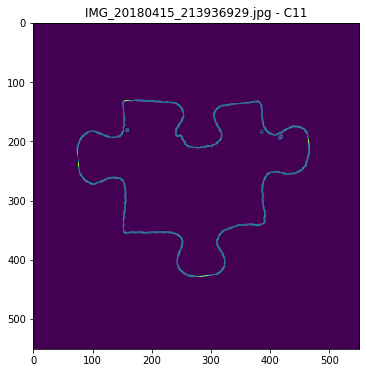

[(0, -232, 30624), (207, -8, -78018), (16, 239, -87261), (223, -1, -33318)]


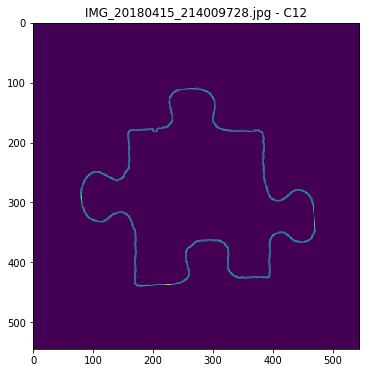

[(0, -223, 40140), (246, -11, -91746), (12, 223, -99702), (258, -11, -38784)]


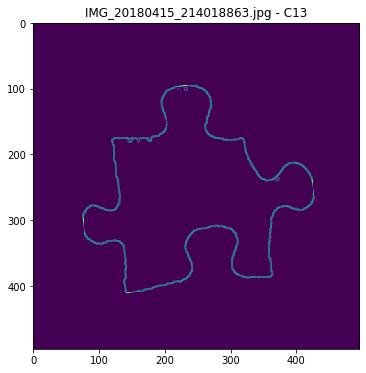

[(-2, -199, 35262), (211, -43, -59616), (24, 223, -94519), (233, -19, -24383)]


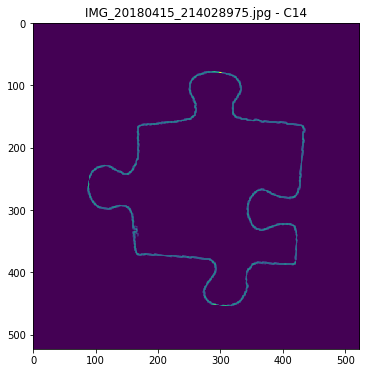

[(0, -267, 44322), (221, 13, -97851), (-15, 256, -92772), (206, 2, -34528)]


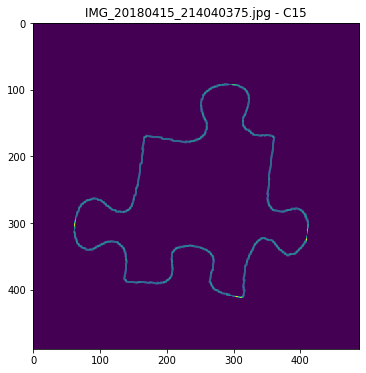

[(-2, -193, 33140), (241, 44, -93670), (-22, 179, -66303), (217, 30, -40905)]


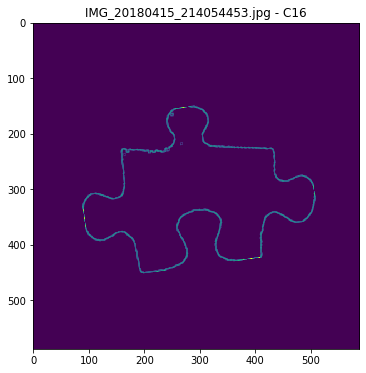

[(-1, -272, 61631), (197, 21, -89632), (26, 219, -103078), (222, -32, -28066)]


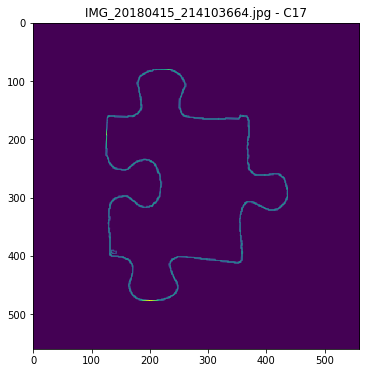

[(0, -240, 38400), (251, 11, -93877), (-11, 226, -88970), (240, -3, -30000)]


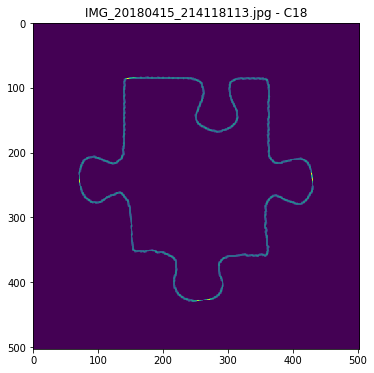

[(-1, -219, 18973), (273, 0, -97734), (-7, 206, -71242), (265, -13, -35717)]


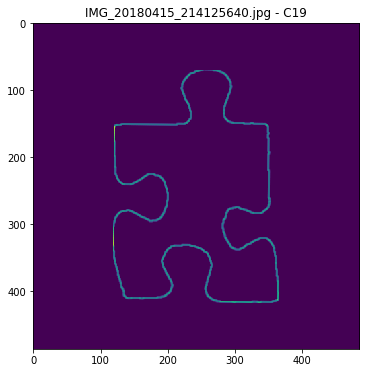

[(0, -227, 34504), (264, -15, -89328), (-8, 228, -91952), (256, -14, -28592)]


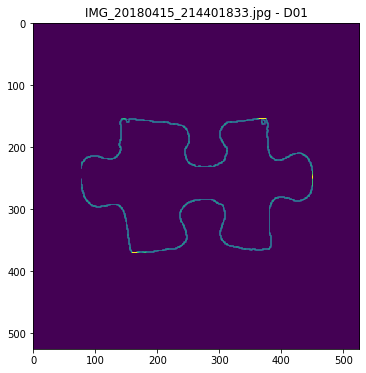

[(0, -235, 36425), (209, -6, -77654), (5, 226, -84174), (214, -15, -27849)]


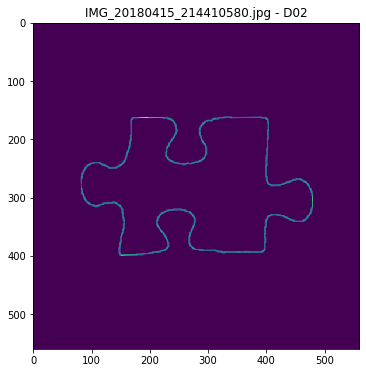

[(-1, -232, 37984), (231, 5, -93210), (4, 249, -99437), (234, 22, -42898)]


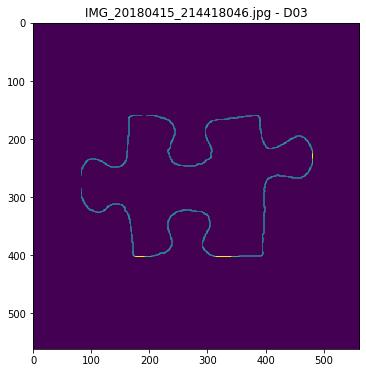

[(-1, -220, 35366), (240, -6, -91686), (2, 221, -88963), (241, -5, -39206)]


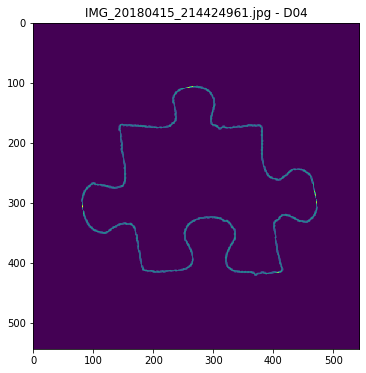

[(-1, -235, 40092), (245, -36, -86281), (-2, 232, -95222), (242, -39, -27734)]


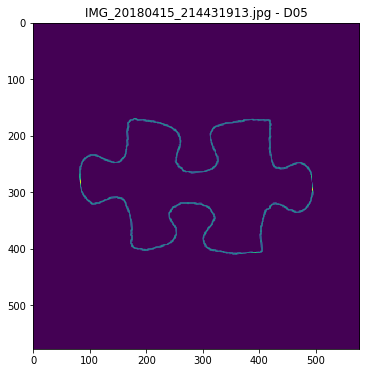

[(0, -247, 42237), (235, 14, -100624), (-9, 231, -90150), (226, -2, -38304)]


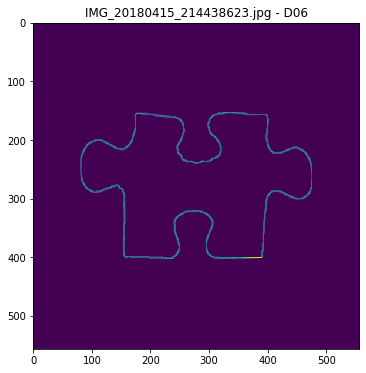

[(1, -224, 34322), (246, 11, -99613), (-4, 233, -91885), (243, 20, -45362)]


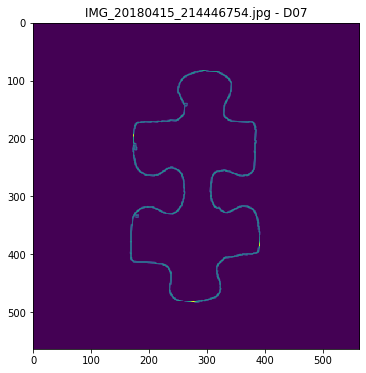

[(0, -204, 35292), (226, -7, -84669), (13, 219, -92412), (239, 8, -43448)]


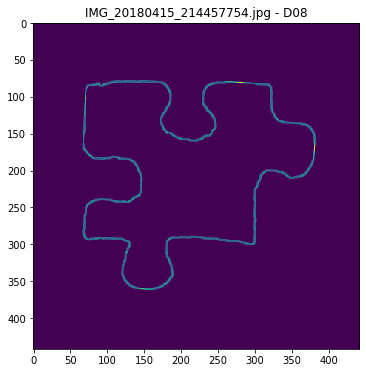

[(0, -246, 20418), (215, 21, -70328), (-7, 230, -66454), (208, 5, -15599)]


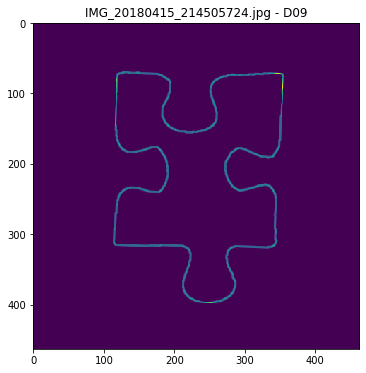

[(0, -234, 16848), (245, 9, -86888), (-3, 230, -71881), (242, 5, -28916)]


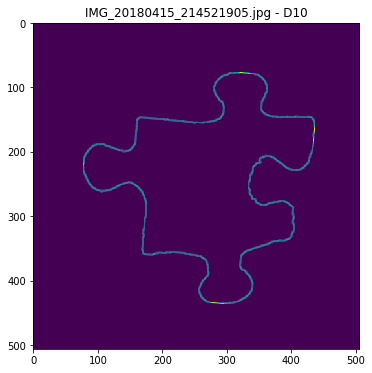

[(0, -273, 40131), (188, 34, -86402), (23, 231, -86562), (211, -8, -32584)]


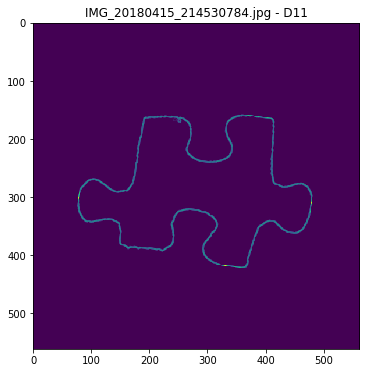

[(1, -222, 35997), (256, 45, -112596), (-41, 218, -76554), (216, 41, -47507)]


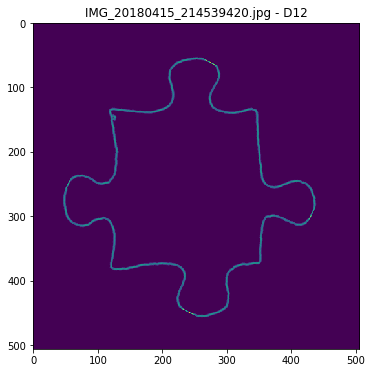

[(1, -228, 30434), (239, -4, -82154), (6, 232, -88868), (246, 0, -29028)]


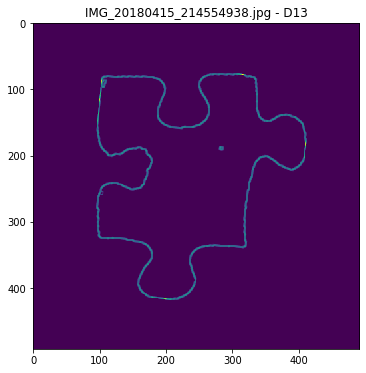

[(0, -229, 18778), (258, 15, -86886), (-17, 220, -69411), (241, 6, -25315)]


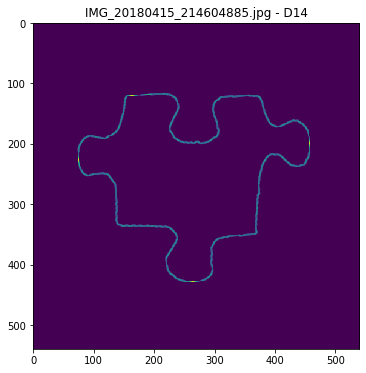

[(0, -222, 26862), (228, 6, -85998), (-15, 231, -75099), (213, 15, -34191)]


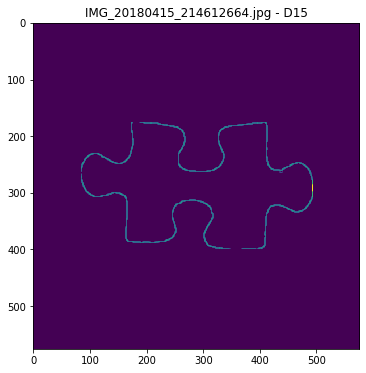

[(0, -237, 41712), (220, 3, -90508), (-12, 243, -91356), (208, 9, -37360)]


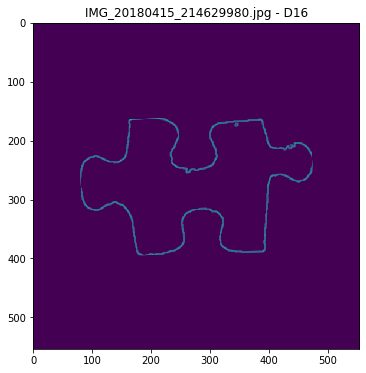

[(-1, -225, 37062), (223, -4, -85649), (5, 216, -85331), (227, -13, -34642)]


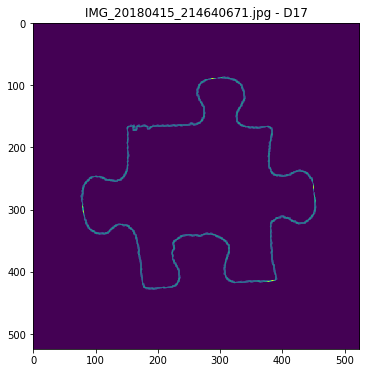

[(1, -228, 37468), (245, -7, -91938), (14, 211, -92139), (260, -24, -35560)]


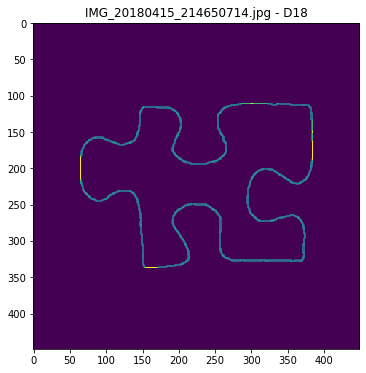

[(-2, -229, 26635), (213, 10, -81857), (10, 218, -74758), (221, -1, -33035)]


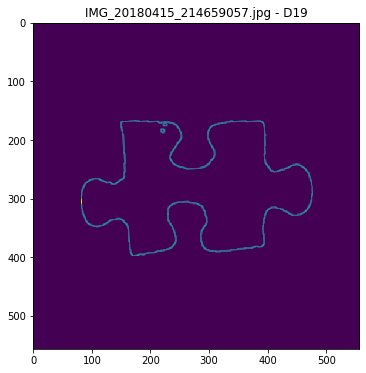

[(-1, -240, 40469), (212, -1, -82301), (17, 225, -91905), (228, -16, -31284)]


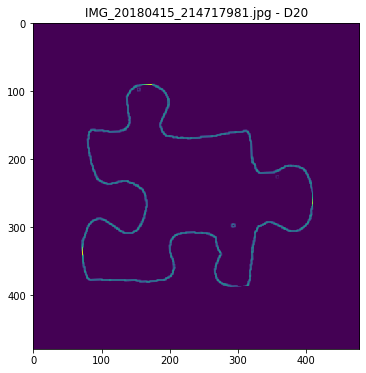

[(1, -231, 35953), (227, -2, -70964), (-7, 238, -89180), (221, 5, -19123)]


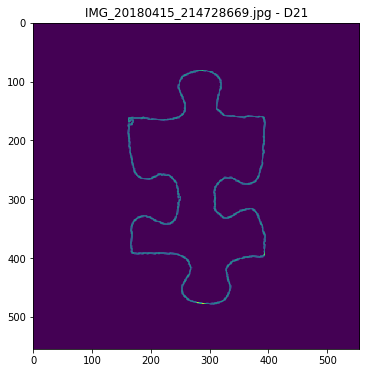

[(-1, -229, 37031), (238, -1, -92898), (-7, 227, -87602), (230, -3, -36777)]


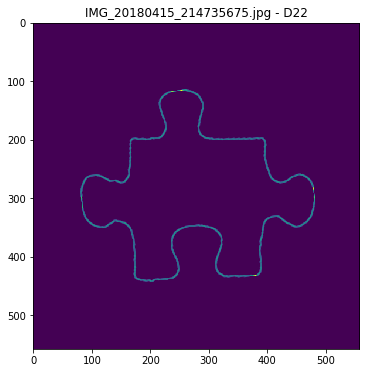

[(0, -226, 44522), (232, 6, -92590), (9, 215, -95727), (241, -5, -39503)]


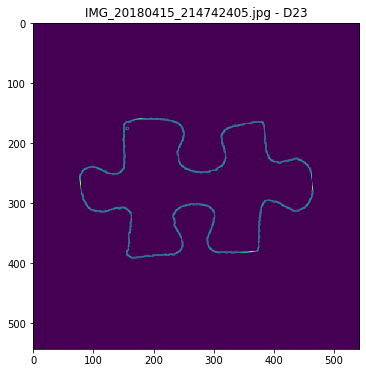

[(-1, -229, 37937), (215, 8, -83227), (8, 219, -85985), (222, -2, -33414)]


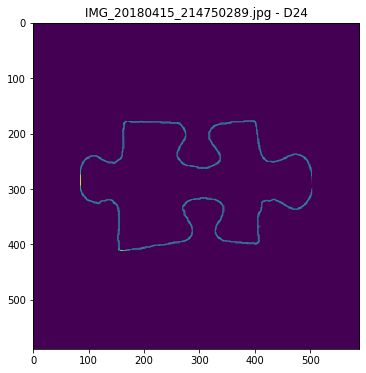

[(-1, -235, 41994), (221, -6, -87117), (12, 252, -105156), (232, 11, -40006)]


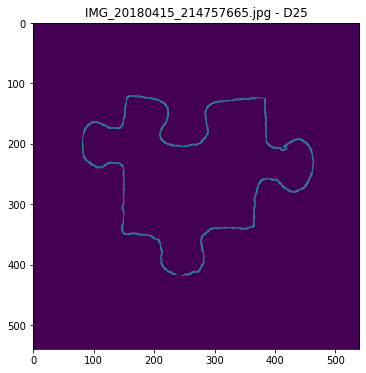

[(3, -226, 26881), (213, 17, -83261), (12, 217, -77497), (228, 8, -36308)]


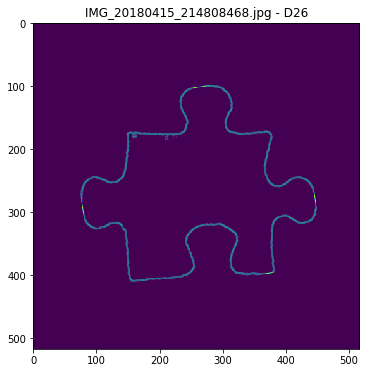

[(-2, -226, 39620), (222, -4, -82340), (13, 226, -93958), (233, -4, -33788)]


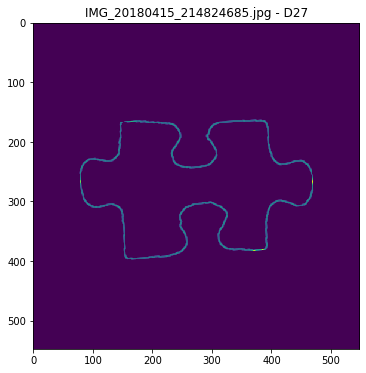

[(-3, -244, 41183), (217, -1, -84249), (14, 237, -95757), (228, -8, -31724)]


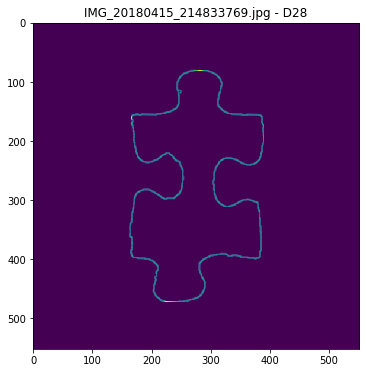

[(0, -218, 34226), (241, 2, -92858), (-2, 217, -85602), (239, 1, -39831)]


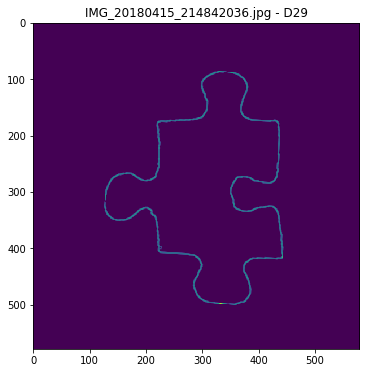

[(0, -210, 36540), (245, -7, -104377), (-12, 217, -85667), (233, 0, -51493)]


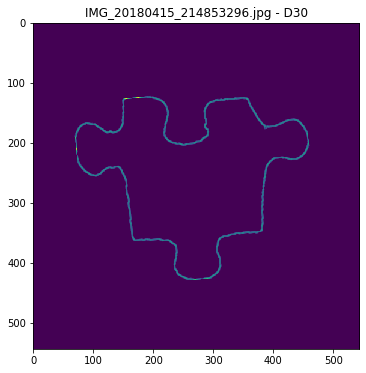

[(-3, -207, 26736), (222, -23, -76180), (16, 214, -80108), (235, -16, -32983)]


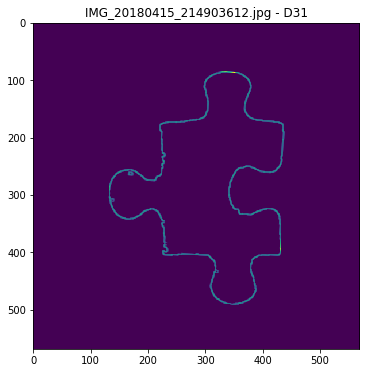

[(0, -211, 37136), (231, 3, -100089), (-2, 203, -81765), (229, -5, -49500)]


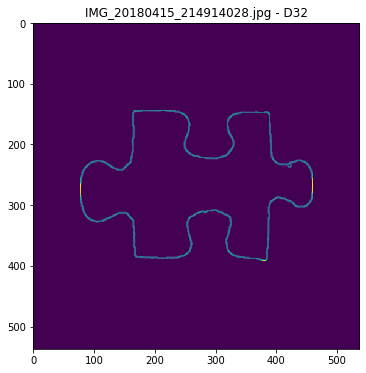

[(1, -221, 31881), (244, 2, -94232), (-7, 218, -82339), (238, -1, -38887)]


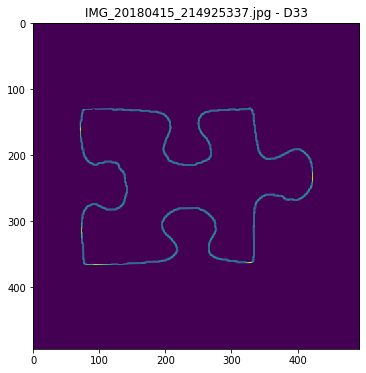

[(-2, -257, 33815), (234, 1, -77583), (1, 255, -92895), (233, -1, -17111)]


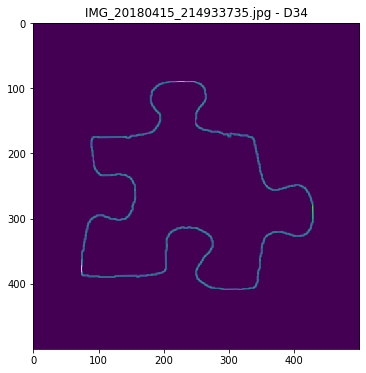

[(0, -248, 43400), (230, -3, -76985), (-18, 266, -101610), (212, 15, -21493)]


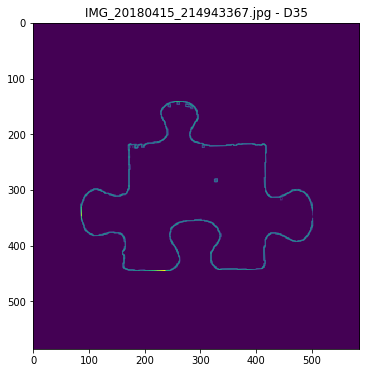

[(-1, -244, 53119), (226, 4, -94654), (-1, 251, -110531), (224, 11, -40691)]


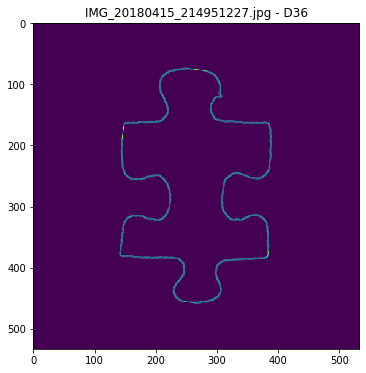

[(0, -236, 38468), (222, 3, -85737), (-4, 241, -91261), (218, 8, -33568)]


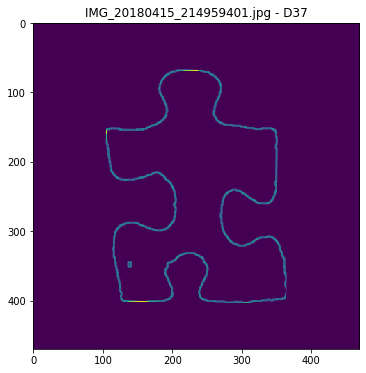

[(0, -242, 36784), (246, -15, -83082), (2, 237, -95050), (248, -20, -23000)]


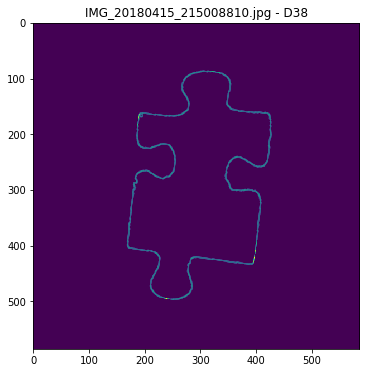

[(0, -231, 37191), (273, 28, -119714), (-30, 226, -86264), (243, 23, -50116)]


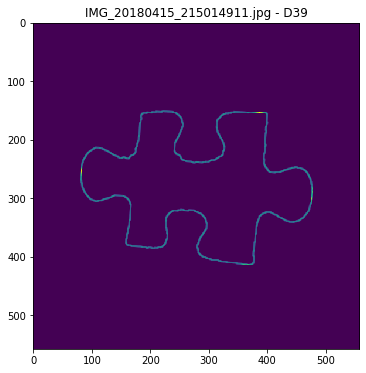

[(0, -214, 32956), (259, 22, -106470), (-35, 219, -77287), (224, 27, -45374)]
D40 : Not enough corners


NoneType: None


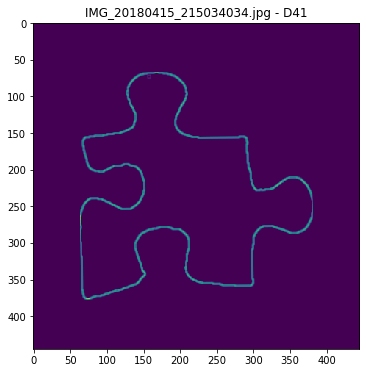

[(0, -222, 34410), (203, -6, -58143), (17, 230, -87389), (220, 2, -15490)]


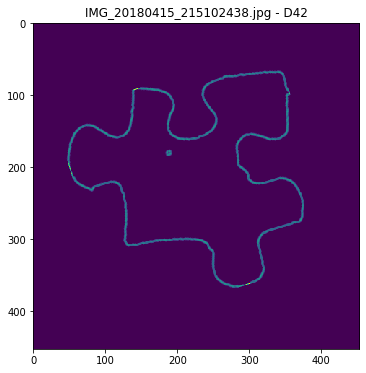

[(-1, -216, 20225), (182, -20, -62406), (35, 245, -80185), (216, 9, -30429)]


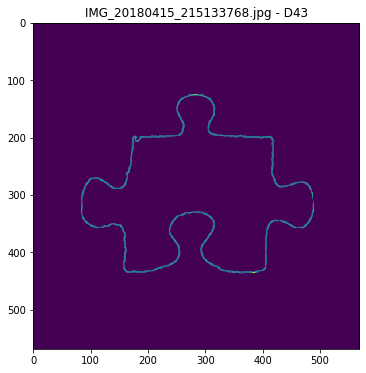

[(0, -240, 47280), (232, 11, -98215), (3, 245, -106314), (235, 16, -44042)]


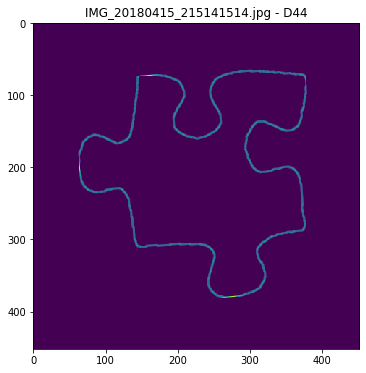

[(-4, -230, 17592), (215, 0, -80195), (25, 231, -75160), (236, 1, -33822)]


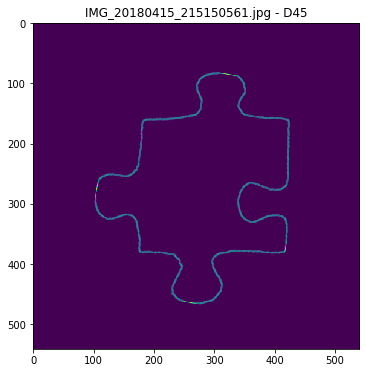

[(0, -242, 38962), (220, 6, -94026), (0, 242, -92202), (220, 6, -40786)]


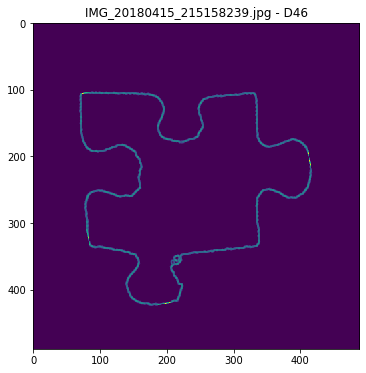

[(-2, -262, 27910), (228, -4, -75052), (3, 251, -84337), (229, -15, -14211)]


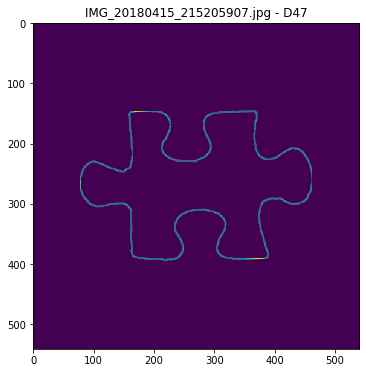

[(-1, -211, 31387), (243, -16, -87558), (-4, 224, -85816), (238, -3, -37398)]


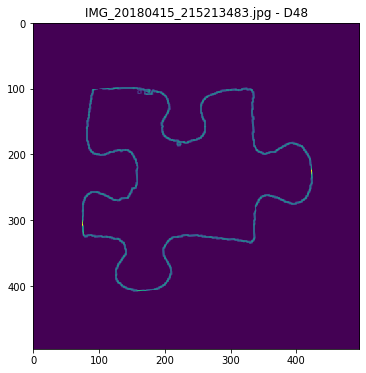

[(-1, -242, 24531), (232, -3, -76492), (-9, 259, -82982), (222, 14, -21172)]


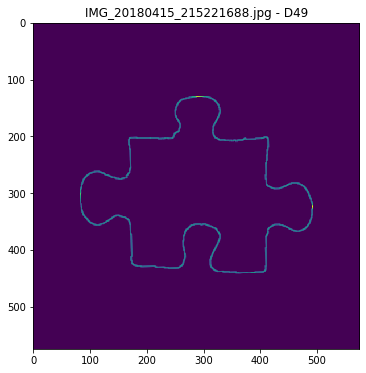

[(-1, -243, 49012), (239, 4, -99268), (-14, 236, -97892), (224, -3, -37253)]


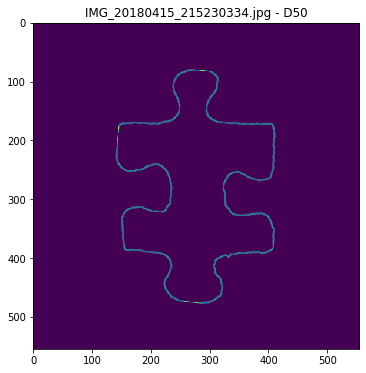

[(0, -262, 45064), (216, 1, -88084), (-2, 253, -97352), (214, -8, -29654)]


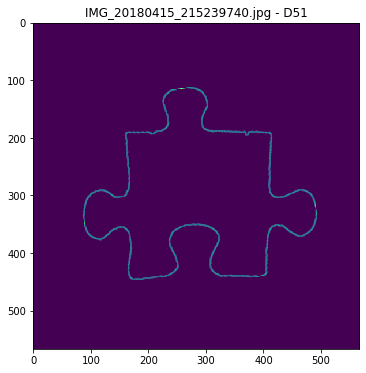

[(-1, -250, 47660), (249, 7, -103413), (4, 237, -105418), (252, -6, -39180)]


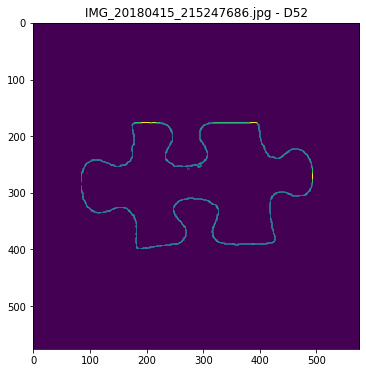

[(-1, -222, 39690), (209, -28, -77808), (13, 242, -98924), (221, -8, -37030)]


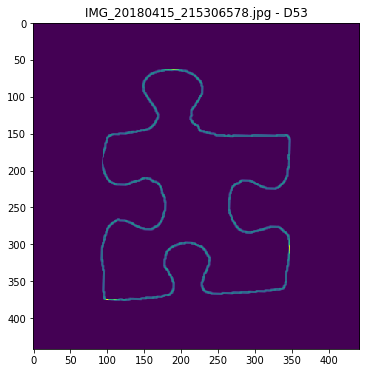

[(0, -244, 37088), (209, 5, -72656), (14, 244, -92830), (223, 5, -23060)]


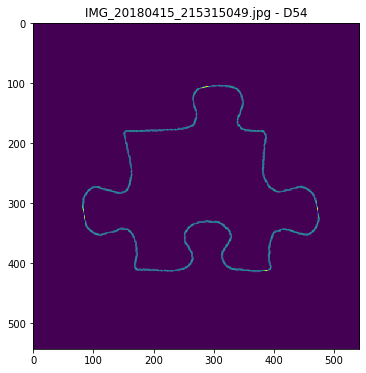

[(-2, -231, 41882), (233, -11, -87048), (-2, 225, -91689), (229, -17, -31519)]


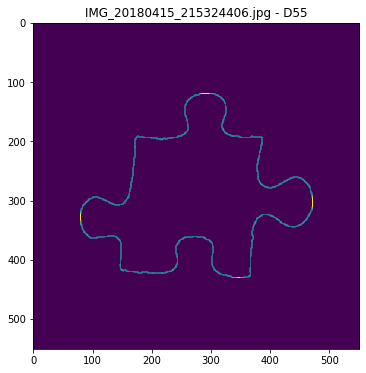

[(0, -211, 40512), (234, 20, -93696), (-10, 218, -89228), (224, 27, -43936)]


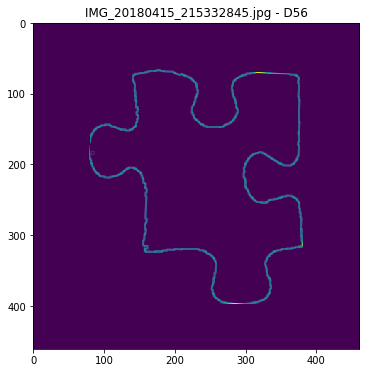

[(0, -232, 16936), (245, -7, -90629), (5, 224, -73127), (250, -15, -33905)]


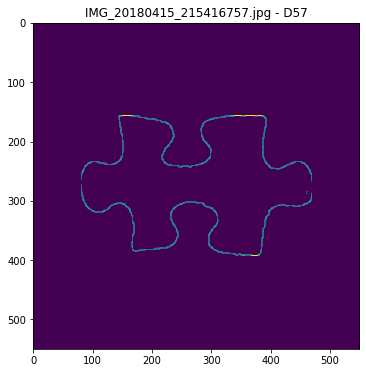

[(1, -248, 38793), (233, 9, -92525), (-8, 216, -81400), (226, -23, -28707)]


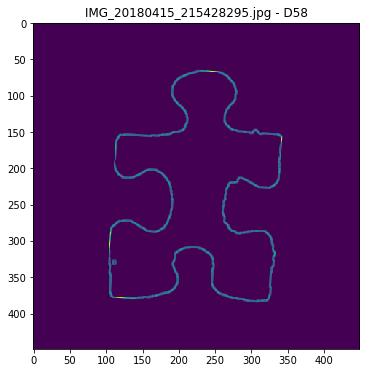

[(0, -225, 35100), (227, 17, -79832), (-6, 218, -81556), (221, 10, -26975)]


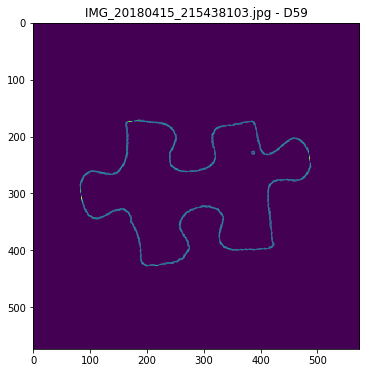

[(-2, -223, 39128), (222, -35, -79672), (29, 232, -103617), (249, -26, -36063)]


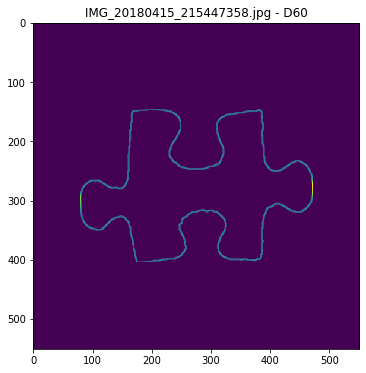

[(-2, -216, 32302), (252, 0, -96516), (5, 210, -85495), (255, -6, -41697)]


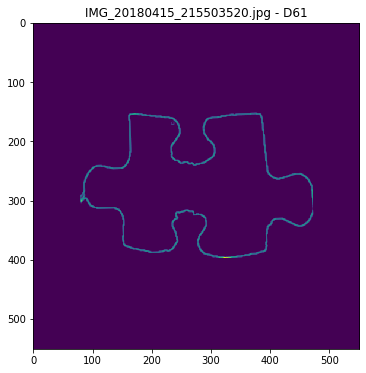

[(-1, -222, 34349), (230, -8, -86866), (-8, 240, -88792), (221, 10, -37121)]


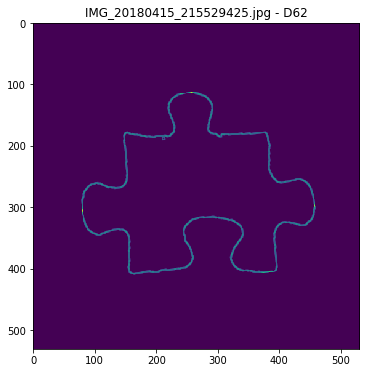

[(-2, -231, 41643), (225, -18, -81864), (5, 241, -98862), (228, -8, -32084)]


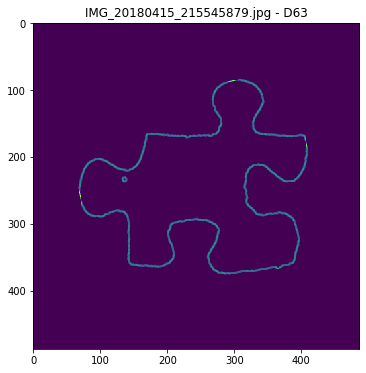

[(1, -234, 38441), (190, 16, -79226), (4, 245, -88768), (195, 27, -37410)]


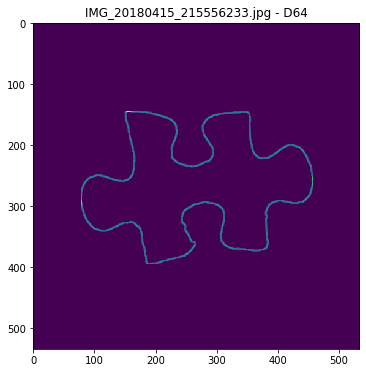

[(-1, -203, 29787), (225, -28, -75140), (24, 197, -82010), (248, -34, -31988)]


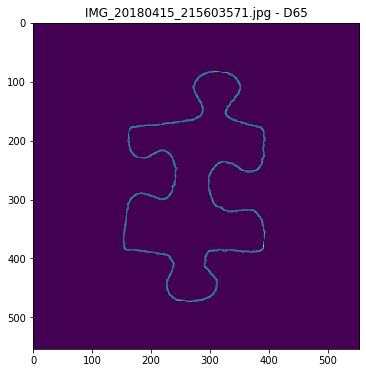

[(0, -225, 40050), (210, 1, -81658), (-3, 234, -89631), (207, 10, -35521)]


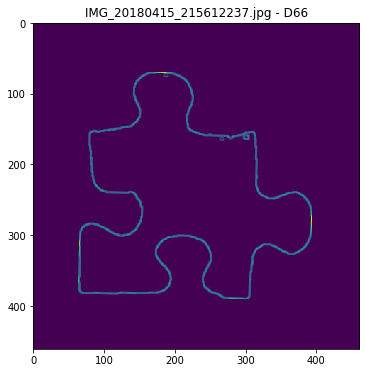

[(0, -231, 35112), (236, 8, -74612), (-9, 240, -90393), (227, 17, -20744)]


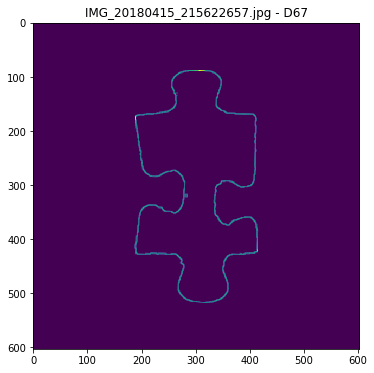

[(0, -219, 37230), (255, -4, -103615), (3, 224, -96439), (258, 1, -49190)]


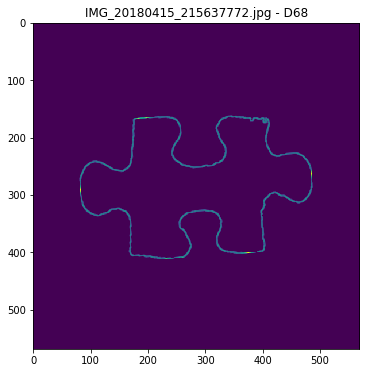

[(-1, -233, 39085), (230, 7, -94772), (8, 232, -95072), (237, 6, -42240)]


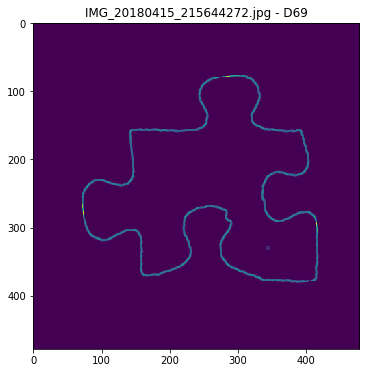

[(0, -250, 39000), (221, -21, -83135), (-8, 255, -92839), (213, -16, -27537)]


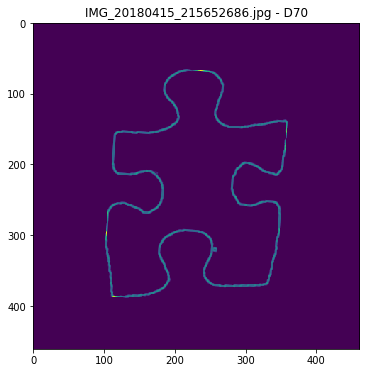

[(2, -235, 48188), (163, 17, -59934), (15, 220, -86555), (180, 2, -20392)]


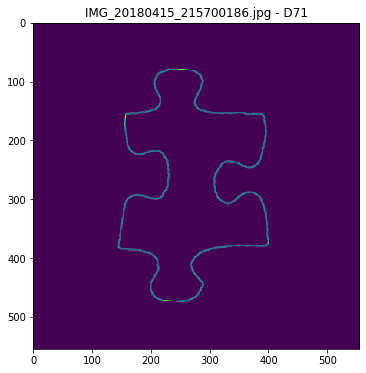

[(0, -235, 36425), (223, -7, -86108), (5, 254, -98002), (228, 12, -37428)]


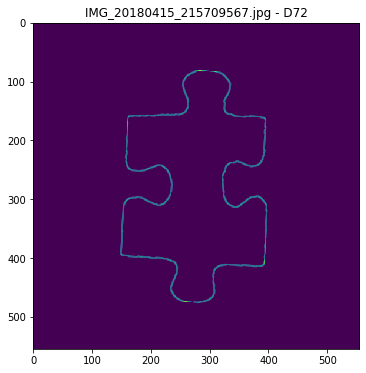

[(0, -233, 37280), (253, 1, -99589), (-18, 245, -94129), (235, 13, -39680)]


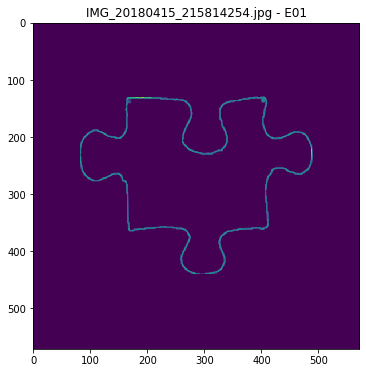

[(-1, -244, 32371), (227, 0, -92389), (4, 242, -88264), (230, -2, -37226)]


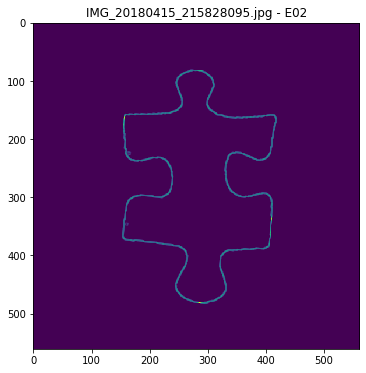

[(0, -258, 40764), (229, 10, -96386), (-15, 251, -91077), (214, 3, -33858)]


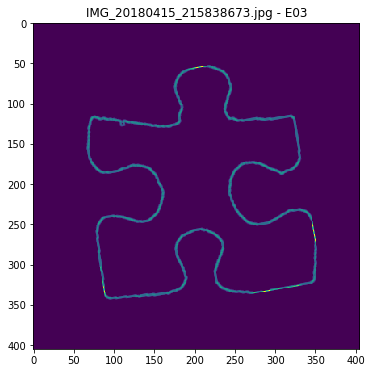

[(-1, -250, 29072), (207, -25, -63779), (19, 258, -89669), (225, -17, -14228)]


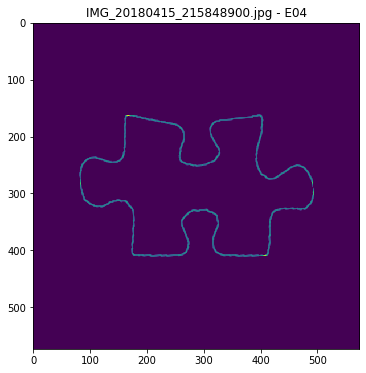

[(-3, -239, 39676), (248, -11, -97181), (-3, 237, -95703), (242, -13, -36588)]


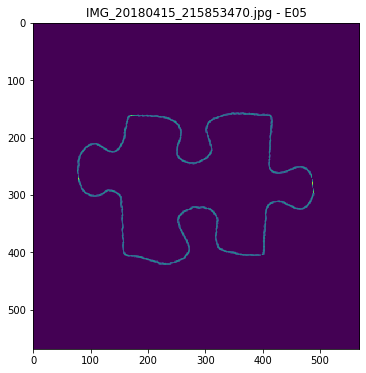

[(-2, -247, 40344), (243, 13, -102196), (2, 242, -98324), (243, 8, -41391)]


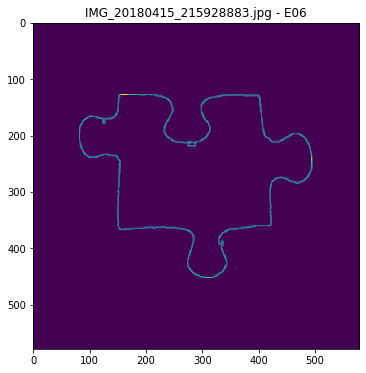

[(0, -248, 31744), (232, -21, -89880), (6, 270, -99720), (238, 1, -36066)]


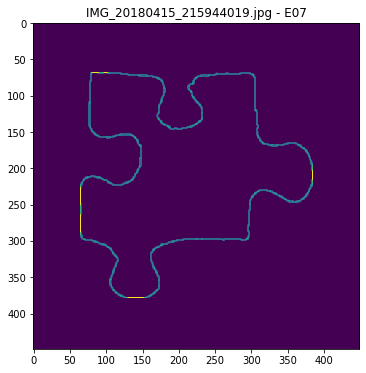

[(1, -224, 15378), (226, 8, -68812), (0, 229, -67784), (227, 13, -18603)]


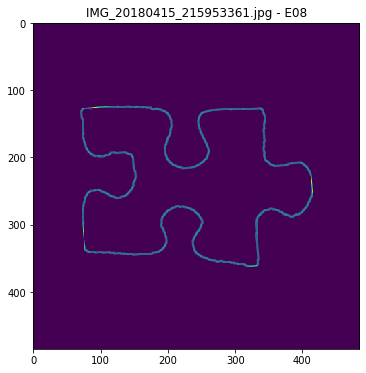

[(1, -271, 34346), (232, 10, -80624), (-21, 256, -85188), (212, -5, -14417)]


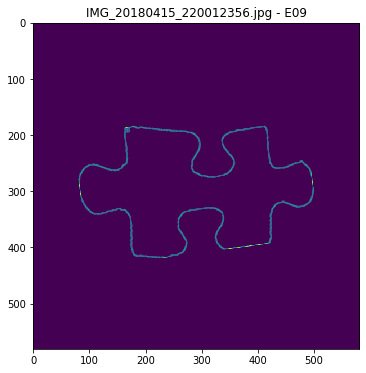

[(-4, -251, 47581), (210, -8, -85056), (21, 243, -104319), (227, -16, -33555)]


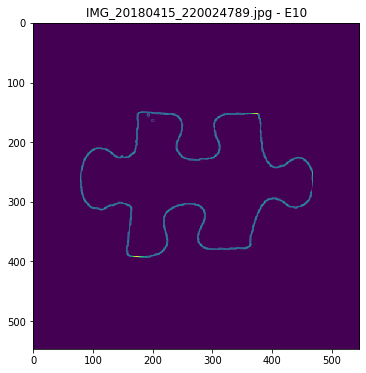

[(4, -201, 29245), (223, 15, -86366), (13, 206, -82162), (240, 20, -45220)]


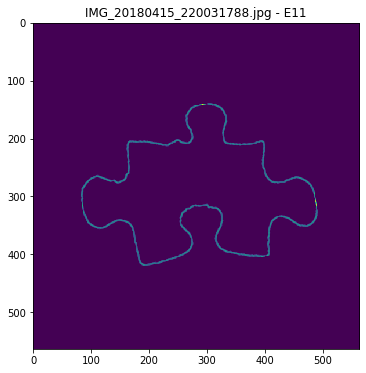

[(-2, -233, 48091), (197, -8, -76388), (16, 221, -94864), (211, -20, -30293)]


In [6]:
postprocess = partial(cv2.blur, ksize=(3, 3))
results = []
error_labels = []

for filename, label in zip(filenames, labels):
    img = cv2.imread(join('images', filename))
    img = img[1750:2500, 1000:2000]
     
    out_dict = process_piece(img, after_segmentation_func=postprocess, scale_factor=0.4, 
                             harris_block_size=5, harris_ksize=5,
                             corner_score_threshold=0.2, corner_minmax_threshold=100)
    
#     plt.figure(figsize=(6, 6))
#     plt.title("{0} - {1}".format(filename, label))
#     plt.imshow(out_dict['extracted'], cmap='gray')
#     plt.scatter(out_dict['xy'][:, 0], out_dict['xy'][:, 1], color='red')
    #plt.colorbar()
#     plt.show()
    
    if 'error' in out_dict:
        print( label, ':', out_dict['error'])
        error_labels.append(label)
        traceback.print_exc()
        continue
        
    else:
        
        plt.figure(figsize=(6, 6))
        plt.title("{0} - {1}".format(filename, label))
        plt.imshow(out_dict['edges'])
        #plot_grid((3, 3), out_dict, '_segmented', '_extracted', '_edges', 'class_image')
        plt.show()
        line_params = out_dict['line_params']
        print(line_params)
        # plot_side_images(out_dict['side_images'], out_dict['inout'])
# dict_keys(['segmented', 'extracted', 'harris', 'xy', 'edges', 'class_image', 'inout', 'side_images'])
#         print(out_dict.keys())
#         xy = out_dict['xy']
#         print(xy)
#         edges = out_dict['edges']
#         print(edges.shape)
        
        results.append({'side_images': out_dict['side_images'], 'inout': out_dict['inout']})
    